## <center>Mayhem at DinoFun World Visitor Communication: Exploratory Analysis</center>

## <center>Submitted By</center>

## <center>Ben Karabinus</center>

## <center>University of Denver</center>

## <center> Ritchie School of Engineering and Computer Science</center>

## <center>COMP 4449, Data Science Capstone</center>

## <center>Fall Quarter 2022</center>

In [396]:
"""read in required libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet

## __Exploratory Data Analysis__

*Objectives*

- Read in communications data for each of the provided days (Friday, Saturday, Sunday).
    - Check for null values.
    - Check for duplicate records.
    - Check that features are typed appropriately.
- Print unique park locations existing in the communications data.
- Explore ID's ("from" and to "columns")
    - Determine number of unique ID's in the data.
        - Determine unique ID's on a day by day basis.
        - Determine the number of unique ID's in the entire dataset
        - Determine the number of unique senders
        - Determine the number of unique receivers
    - Determine if any visitors communicated over multiple days.
    - Analyze senders and receivers
        - Identify number of senders who did not receive a message.
        - Identify number of receivers who did not send a message (excluding external users).
- Sender and receiver numeric analysis
    - Print descripive statistics for number of messages sent and received between all users.
    - Which user sent the most messages.
    - Which user received the most messages.  

### Read in the communication data for each of the provided days.

In [397]:
"""read in the three data sets"""

# Friday
friday = pd.read_csv('../ProvidedData/comm-data-Fri.csv')
# Saturday
saturday = pd.read_csv('../ProvidedData/comm-data-Sat.csv')
# Sunday
sunday = pd.read_csv('../ProvidedData/comm-data-Sun.csv')

Check for null values.

In [398]:
"""Check for null  values in friday"""

friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948739 entries, 0 to 948738
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  948739 non-null  object
 1   from       948739 non-null  int64 
 2   to         948739 non-null  object
 3   location   948739 non-null  object
dtypes: int64(1), object(3)
memory usage: 29.0+ MB


In [399]:
"""check for  null values in saturday"""

saturday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655866 entries, 0 to 1655865
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Timestamp  1655866 non-null  object
 1   from       1655866 non-null  int64 
 2   to         1655866 non-null  object
 3   location   1655866 non-null  object
dtypes: int64(1), object(3)
memory usage: 50.5+ MB


In [400]:
"""chek for null values in sunday"""

sunday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548724 entries, 0 to 1548723
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Timestamp  1548724 non-null  object
 1   from       1548724 non-null  int64 
 2   to         1548724 non-null  object
 3   location   1548724 non-null  object
dtypes: int64(1), object(3)
memory usage: 47.3+ MB


No null values were identified in the data.

### Check for duplicate records in the data.

In [401]:
"""check for duplicates in friday"""

friday.duplicated().sum()

61

In [402]:
"""examine duplicates for friday"""

friday[friday.duplicated()]

,Timestamp,from,to,location
11815,2014-6-06 08:40:26,1049061,20967,Wet Land
193603,2014-6-06 12:00:01,1198534,1124046,Kiddie Land
237442,2014-6-06 12:31:54,152338,1763715,Tundra Land
237443,2014-6-06 12:31:54,152338,427493,Tundra Land
237444,2014-6-06 12:31:54,152338,179142,Tundra Land
...,...,...,...,...
943132,2014-6-06 22:32:03,98371,203445,Kiddie Land
943133,2014-6-06 22:32:03,98371,140461,Kiddie Land
943134,2014-6-06 22:32:03,98371,1494697,Kiddie Land
943135,2014-6-06 22:32:03,98371,209832,Kiddie Land


In [403]:
"""check for duplicates in saturday"""

saturday.duplicated().sum()

15

In [404]:
"""examine duplicates in saturday"""

saturday[saturday.duplicated()]

,Timestamp,from,to,location
89387,2014-6-07 09:37:27,64304,1687201,Tundra Land
89388,2014-6-07 09:37:27,64304,1713404,Tundra Land
312036,2014-6-07 11:45:25,1022105,1896855,Wet Land
345446,2014-6-07 12:00:30,133576,1772541,Wet Land
345454,2014-6-07 12:00:30,133576,1791065,Wet Land
998310,2014-6-07 16:57:36,587358,565854,Wet Land
998311,2014-6-07 16:57:36,587358,1431907,Wet Land
998312,2014-6-07 16:57:36,587358,1257219,Wet Land
998313,2014-6-07 16:57:36,587358,1446327,Wet Land
1035170,2014-6-07 17:15:32,1660523,1346096,Coaster Alley


In [405]:
"""check duplicates for sunday"""

sunday.duplicated().sum()

1181

In [406]:
"""examine duplicates for sunday"""

sunday[sunday.duplicated()]

,Timestamp,from,to,location
16478,2014-6-08 08:42:01,782954,1456070,Coaster Alley
140955,2014-6-08 10:29:11,549795,216468,Wet Land
140956,2014-6-08 10:29:11,549795,2013854,Wet Land
140957,2014-6-08 10:29:11,549795,495857,Wet Land
140958,2014-6-08 10:29:11,549795,417142,Wet Land
...,...,...,...,...
815147,2014-6-08 15:37:22,839736,636823,Entry Corridor
977685,2014-6-08 16:51:34,2067135,1745381,Wet Land
1269701,2014-6-08 19:10:49,839736,1376135,Entry Corridor
1347717,2014-6-08 19:51:09,231019,739587,Wet Land


Its worth considering what these duplicate records actually mean? There are numerous possibilities why the combination of [Timestamp,  from, to, location] might produce duplicate records. One such possibility is that users of the park application are involved in  the same  group messaging thread, but are texting each other individually too.

### Check that features are typed appropriately.

In [407]:
"""check data types for Friday"""

friday.dtypes

Timestamp    object
from          int64
to           object
location     object
dtype: object

In [408]:
"""check data types for saturday"""

saturday.dtypes

Timestamp    object
from          int64
to           object
location     object
dtype: object

In [409]:
"""check data types for sunday"""

sunday.dtypes

Timestamp    object
from          int64
to           object
location     object
dtype: object

Printing data types for the friday, saturday, and sunday datasets shows the "Timestamp" column is  not appropriately typed. This column will be converted to type datetime64. The "from" column was read in as an integer type while the "to" column was brought in as an object. This is a result of the "to" column containing the value  "external" this is a  valid value indicating  communication with someone outside of DinoFun world. To ensure the same typing the "from" column will transformed to type object (string).

In [410]:
"""convert the Timestamp column to datetime format in friday, saturday, and sunday"""

#  convert the timestamp column
friday['Timestamp'] = pd.to_datetime(friday['Timestamp'])
saturday['Timestamp'] = pd.to_datetime(saturday['Timestamp'])
sunday['Timestamp'] = pd.to_datetime(sunday['Timestamp'])
#vrify  type change
print(friday.dtypes)
print(saturday.dtypes)
print(sunday.dtypes)

Timestamp    datetime64[ns]
from                  int64
to                   object
location             object
dtype: object
Timestamp    datetime64[ns]
from                  int64
to                   object
location             object
dtype: object
Timestamp    datetime64[ns]
from                  int64
to                   object
location             object
dtype: object


In [411]:
"""convert from column to type object (string)"""

# convert column
friday =  friday.astype({'from':'object'})
saturday = saturday.astype({'from': 'object'})
sunday = sunday.astype({'from':'object'})

# verify conversion
print(friday.dtypes)
print(saturday.dtypes)
print(sunday.dtypes)

Timestamp    datetime64[ns]
from                 object
to                   object
location             object
dtype: object
Timestamp    datetime64[ns]
from                 object
to                   object
location             object
dtype: object
Timestamp    datetime64[ns]
from                 object
to                   object
location             object
dtype: object


### Print  unique locations existing in the communications data.

In [412]:
"""print unique locations existing in communications data"""

# friday
print("Friday")
print(friday['location'].unique())
print("Saturday")
print(saturday['location'].unique())
print("Sunday")
print(sunday['location'].unique())

Friday
['Kiddie Land' 'Entry Corridor' 'Tundra Land' 'Wet Land' 'Coaster Alley']
Saturday
['Entry Corridor' 'Kiddie Land' 'Tundra Land' 'Coaster Alley' 'Wet Land']
Sunday
['Kiddie Land' 'Entry Corridor' 'Tundra Land' 'Wet Land' 'Coaster Alley']


Printing unique location values for each day of the weekend shows identical results, five unique locations (Kiddie Land, Entry Corridor, Tundra Land, Wet Land, Coaster Alley).

## Explore ID's ("from" and to "columns")

### How many unique ID's exist in the data?

In [413]:
"""determine unique ID's"""

num_users_fri = pd.concat([friday['from'], friday['to']]).nunique()
num_users_sat = pd.concat([saturday['from'], saturday['to']]).nunique()
num_users_sun = pd.concat([sunday['from'],sunday['to']]).nunique()
combined = pd.concat([friday, saturday, sunday])
combined = combined.astype({'from':'object'})
all_id = pd.Series(pd.concat([combined['to'], combined['from']]).unique())
total_users = all_id.count()
print("The total number of communication app users on Friday was: ", num_users_fri)
print("The total number of communication app users on Saturday was: ", num_users_sat)
print("The total number of communication app users on Sunday was: ", num_users_sun)
print("The total number of communication app users for the entire weekend was: ", total_users)

The total number of communication app users on Friday was:  5876
The total number of communication app users on Saturday was:  10525
The total number of communication app users on Sunday was:  12158
The total number of communication app users for the entire weekend was:  18820


Determine the number of unique senders.

In [414]:
"""get unique senders for each day and whole weekend"""

# calculate unique senders
unique_senders_fri = friday['from'].nunique()
unique_senders_sat = saturday['from'].nunique()
unique_senders_sun = sunday['from'].nunique()
unique_senders_total = combined['from'].nunique()
# print values
print("The total number of unique senders on Friday was: ", unique_senders_fri)
print("The total number of unique senders on Saturday was: ", unique_senders_sat)
print("The total number of unique senders on Sunday was: ", unique_senders_sun)
print("The total number of unique senders was: ", unique_senders_total)

The total number of unique senders on Friday was:  2950
The total number of unique senders on Saturday was:  5297
The total number of unique senders on Sunday was:  6118
The total number of unique senders was:  9429


Determine the number of unique receivers.

In [415]:
# calculate unique receivers 
# (note this calculation does not account for the fact that all external receivers are labeled as "external")

unique_receivers_fri = friday['to'].nunique()
unique_receivers_sat = saturday['to'].nunique()
unique_receivers_sun = sunday['to'].nunique()
unique_receivers_total = combined['to'].nunique()
# print values
print("The total number of unique receivers on Friday was: ", unique_receivers_fri)
print("The total number of unique receivers on Saturday was: ", unique_receivers_sat)
print("The total number of unique receivers on Sunday was: ", unique_receivers_sun)
print("The total number of unique receivers was: ", unique_receivers_total)

The total number of unique receivers on Friday was:  2926
The total number of unique receivers on Saturday was:  5228
The total number of unique receivers on Sunday was:  6040
The total number of unique receivers was:  9391


Which users communicated over multiple days.

In [416]:
"""determine how many users communicated over multiple days"""

# get all unique users in each individual day
unique_users_fri = pd.Series(pd.concat([friday['from'], friday['to']]).unique())
unique_users_sat = pd.Series(pd.concat([saturday['from'], saturday['to']]).unique())
unique_users_sun = pd.Series(pd.concat([sunday['from'],sunday['to']]).unique())
# create the combined dataframe
combined_unique = pd.DataFrame(pd.concat([unique_users_fri, unique_users_sat, unique_users_sun]), columns=['unique_id'])
# filter ID of external receivers
combined_unique = combined_unique[combined_unique['unique_id'] != 'external']
# add column to indicate if users were active in the park on Friday
combined_unique['active_friday'] = combined_unique['unique_id'].apply(lambda x: True if (x in unique_users_fri.values) else False)
# add column to indicate if users were active in the park on Saturday
combined_unique['active_saturday'] = combined_unique['unique_id'].apply(lambda x: True if (x in unique_users_sat.values) else False)
# add column to indicate if users were active in the park on Sunday
combined_unique['active_sunday'] = combined_unique['unique_id'].apply(lambda x: True if (x in unique_users_sat.values) else False)

In [417]:
"""print the number of unique users who attended for multiple days"""

friday_saturday = combined_unique[(combined_unique['active_friday'] == True) & (combined_unique['active_saturday'] == True)].shape[0]
saturday_sunday = combined_unique[(combined_unique['active_saturday'] == True) & (combined_unique['active_sunday'] == True)].shape[0]
friday_saturday_sunday = saturday_sunday = combined_unique[(combined_unique['active_saturday'] == True) & (combined_unique['active_saturday']\
                                                            == True) & (combined_unique['active_sunday'] == True)].shape[0]
print("The total number of users who attended the park on Friday and Saturday was: ", friday_saturday)
print("The total number of users who attended the park on Saturday and Sunday was: ", saturday_sunday)
print("The total number of users who attended the park on Friday, Saturday and Sunday was: ", friday_saturday_sunday)

The total number of users who attended the park on Friday and Saturday was:  9910
The total number of users who attended the park on Saturday and Sunday was:  20229
The total number of users who attended the park on Friday, Saturday and Sunday was:  20229


## Sender and receiver numeric analysis

Create grouped dataframes to analyze sender and receiver message volume

In [418]:
"""group data by "from" and "to" columns to analyze which users sen and received the most messages"""

from_messages_count = pd.DataFrame(combined.groupby(by=['from']).size(), columns=['from_message_count'])
from_messages_count.reset_index()
to_messages_count = pd.DataFrame(combined.groupby(by=['to']).size(), columns=['to_message_count'])
to_messages_count.reset_index()


,to,to_message_count
0,100025,989
1,1000279,69
2,1000473,85
3,1000618,33
4,100068,63
...,...,...
9386,999107,774
9387,999412,59
9388,999764,1150
9389,999970,30


Which user sent the most messages.

In [419]:
from_messages_count[from_messages_count['from_message_count'] == from_messages_count['from_message_count'].max()]

,from_message_count
from,
1278894,190360


Print summary statistics for sent message volume.

In [420]:
"""print summary statistics for sent message volume"""

from_messages_count['from_message_count'].agg(func=['min', 'median', 'mean', 'max','skew'])

min            1.000000
median       211.000000
mean         440.484569
max       190360.000000
skew          79.237159
Name: from_message_count, dtype: float64

Which user recieved the most messages.

In [421]:
to_messages_count[to_messages_count['to_message_count'] == to_messages_count['to_message_count'].max()]

,to_message_count
to,
1278894,189894


Print summary statistics for received message volume.

In [422]:
to_messages_count['to_message_count'].agg(func=['min', 'median', 'mean', 'max','skew'])

min            1.000000
median       192.000000
mean         442.266958
max       189894.000000
skew          71.832911
Name: to_message_count, dtype: float64

Identify number of senders who did not receive a message.

In [423]:
"""find the number of senders who did not receive a message"""

# get the set of receivers and senders
senders_set = set(combined['from'].values)
receivers_set = set(combined['to'].values)
# find senders who did not receive
num_senders_no_receive = len(senders_set.difference(receivers_set))
print("The number of senders who did not receive any messages is: ", num_senders_no_receive)

The number of senders who did not receive any messages is:  9429


Identify number of receivers who did not send a message (excluding external users).

In [424]:
"""find the number of receivers that did not send a message"""

# get set of receivers and senders
receivers_no_external = set(combined[combined['to'] != 'external']['to'].values)
senders_set = set(combined['from'].values)
# find receivers who did not send
num_receivers_no_send = len(receivers_no_external.difference(senders_set))
print("The number of receivers who did not send a message is: ", num_senders_no_receive)

The number of receivers who did not send a message is:  9429


## Cluster Analysis

*Objectives*

- Use Kmeans clustering to group users by count of sent and received messages.
    - Group combined dataframe by "from" feature to count total messages sent by each user.
    - Group combined dataframe by "to" feature to count total messages sent to each user (excluding external users).
    - Merge the grouped data into single dataframe and remove extreme outliers.
    - Create an elbow plot determine proper number of clusters.
    - Appply labels to each user based off Kmeans results.
    - Label extreme outliers and add them back into the dataframe.
- Visualize distribution of sent and received messages.
    - Visualize distribution for each cluster.

In [425]:
"""prepare data for cluster analysis"""

# get grouped datafram objects
from_messages_count = pd.DataFrame(combined.groupby(by=['from']).size(), columns=['sent'])
from_messages_count.reset_index(inplace=True)
to_messages_count = pd.DataFrame(combined.groupby(by=['to']).size(), columns=['received'])
to_messages_count.reset_index(inplace=True)
# exclude messages sent to external users
to_messages_count = to_messages_count[to_messages_count['to'] != 'external']
# convert the "to" feature to integer type for merge
to_messages_count = to_messages_count.astype({'to': 'int64'})
# merge grouped dataframe objects to create message volume dataframe
message_volume = from_messages_count.merge(to_messages_count, how='outer', left_on='from', right_on='to')
message_volume.drop(columns=['to'], inplace=True)
message_volume.rename(columns={'from':'user_id'}, inplace=True)
# fill any resulting null values
message_volume.fillna(0, inplace=True)

In [426]:
"""remove extreme outliers from the data"""

message_volume_scaled = message_volume.copy()
message_volume_scaled = message_volume_scaled[message_volume_scaled['user_id'] != 1278894]
message_volume_scaled = message_volume_scaled[message_volume_scaled['user_id'] != 839736]
message_volume_outliers = message_volume.loc[[5632, 3741]]
message_volume = message_volume[message_volume['user_id'] != 1278894]
message_volume = message_volume[message_volume['user_id'] != 839736]
scaler = MinMaxScaler()
message_volume_scaled.iloc[:,-2: ] = scaler.fit_transform(message_volume_scaled.iloc[:, -2:])

In [427]:
"""create elbow plot to determine proper number of clusters"""

# calculate the within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42, n_init=10)
    kmeans.fit(message_volume_scaled.iloc[:, -2:])
    wcss.append(kmeans.inertia_)

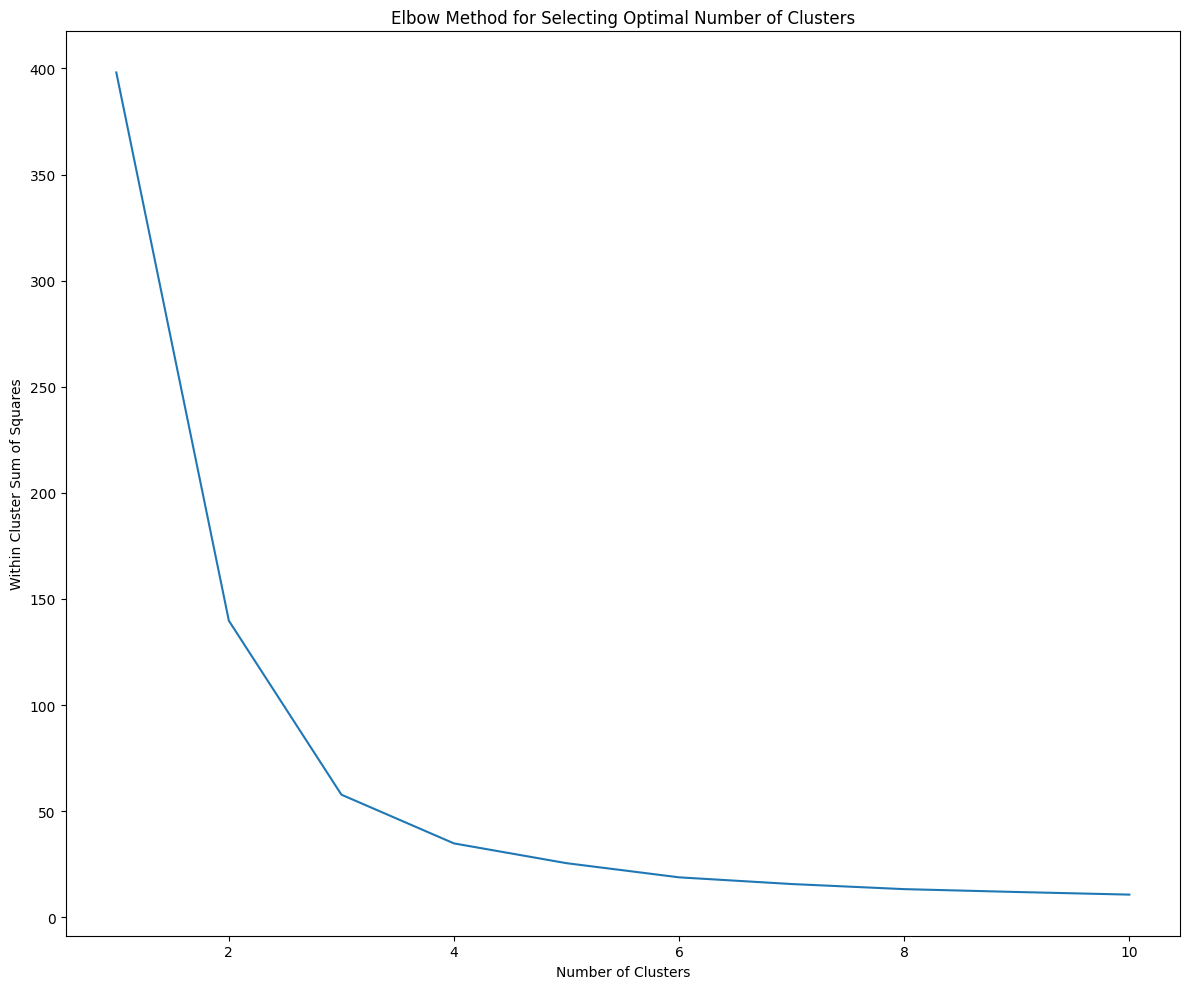

In [428]:
# create the elbow plot
clusters = [i for i in range(1, 11)]
wcss = wcss
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Method for Selecting Optimal Number of Clusters')
plt.tight_layout()
plt.show()

In [429]:
"""define a helper function to visualize K-means results"""

def plot_kmeans(model, data, predictions):
    # instantiate the pyplot objects
    fig, ax = plt.subplots(figsize=(12, 10))
    # get unique labels in predictions
    labels = np.unique(predictions)
    # get centroids form the fit model
    centroids = model.cluster_centers_
    # iterate over predicted labels and create scatter plot for each
    for label in labels:
        filtered = data[data['cluster_labels'] == label]
        plt.scatter(filtered.iloc[:, :1], filtered.iloc[:, 1:2])
    # add centroids to the graph
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black')
    # add legend for label values
    plt.legend(labels)
    # add title
    title = 'K-means Results {} Centroids'.format(len(labels))
    plt.title(title)
    plt.tight_layout()
    plt.show()

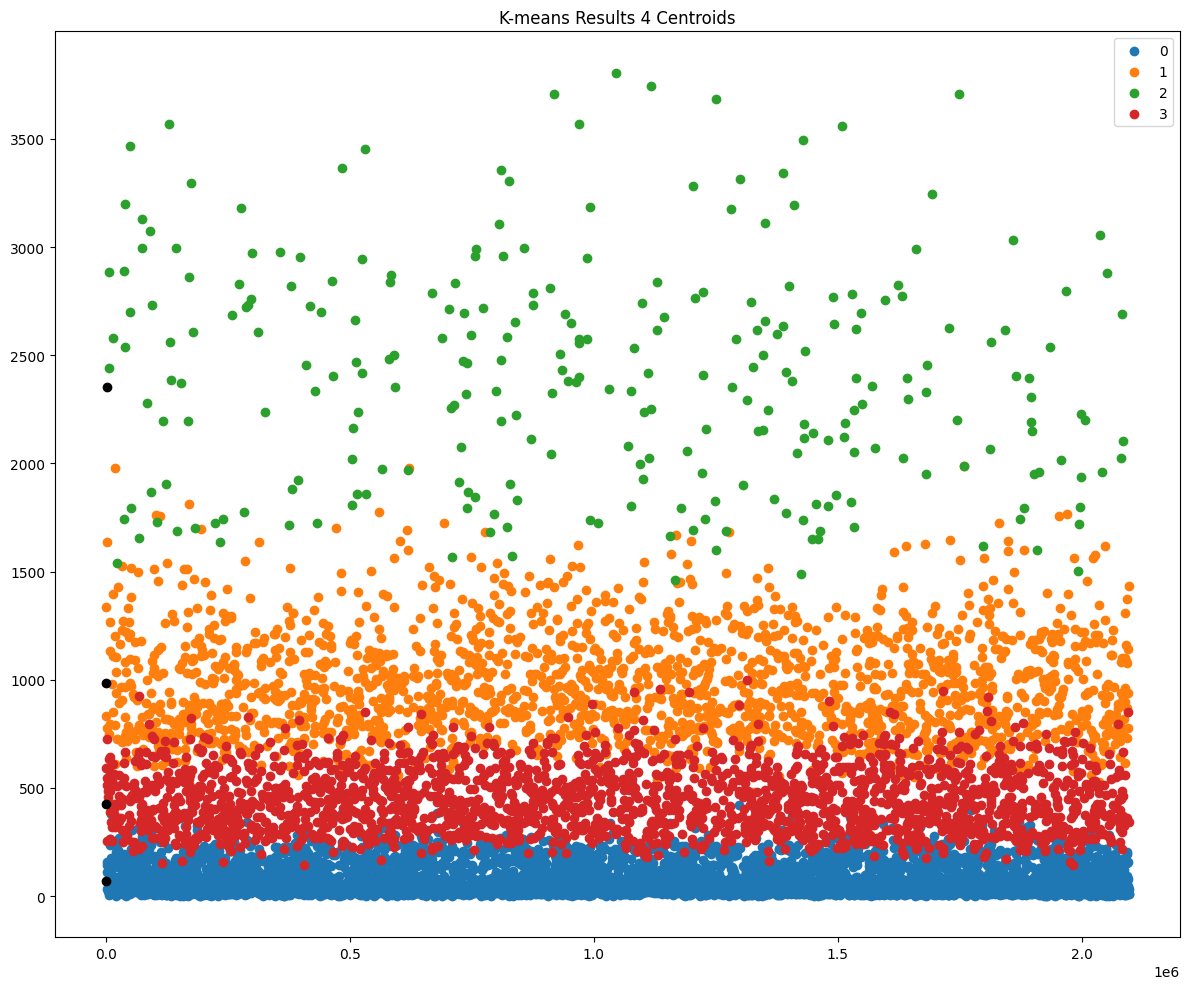

In [430]:
"""instantiate model, append cluster labels to data, plot Kmeans results"""

kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=42)
labels = kmeans.fit_predict(message_volume.iloc[:, -2:])
message_volume['cluster_labels'] = labels
plot_kmeans(kmeans, message_volume, labels)

In [431]:
"""apply labels determined by Kmeans to the data"""

message_volume['cluster_labels'] = labels
# create select conditions
conditions = [
    message_volume['cluster_labels'] == 0,
    message_volume['cluster_labels'] == 1,
    message_volume['cluster_labels'] == 2,
    message_volume['cluster_labels'] == 3
]
# create select values
values = [
    'low',
    'high',
    'very_high',
    'medium'
]
# apply select to the data
message_volume['message_volume'] = np.select(conditions, values)
# drop the cluster_labels column
message_volume.drop(columns=['cluster_labels'], inplace=True)
# add labels to outliers
message_volume_outliers['message_volume'] =['extreme', 'extreme']
# add outliers bacck to labeleed dataframe
message_volume = pd.concat([message_volume, message_volume_outliers])

Visualize the distribution of sent and recieved users.

<AxesSubplot: xlabel='message_volume', ylabel='sent'>

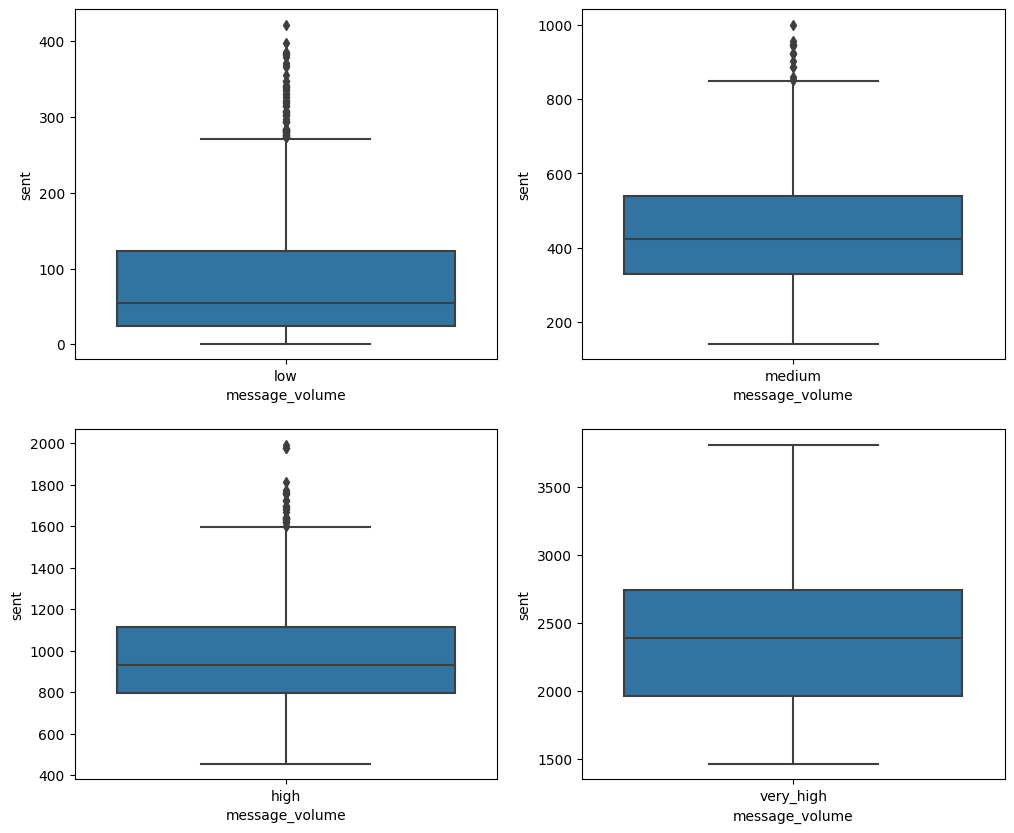

In [432]:
"""plot the distribution of sent messages by volume label"""

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
low_volume_senders = message_volume[message_volume['message_volume'] == 'low']
sns.boxplot(data=low_volume_senders, y='sent', x='message_volume', ax=ax[0, 0])
medium_volume_senders = message_volume[message_volume['message_volume'] == 'medium']
sns.boxplot(data=medium_volume_senders, y='sent', x='message_volume', ax=ax[0, 1])
high_volume_senders = message_volume[message_volume['message_volume'] == 'high']
sns.boxplot(data=high_volume_senders, y='sent', x='message_volume', ax=ax[1, 0])
very_high_volume_senders = message_volume[message_volume['message_volume'] == 'very_high']
sns.boxplot(data=very_high_volume_senders, y='sent', x='message_volume', ax=ax[1, 1])

<AxesSubplot: xlabel='message_volume', ylabel='received'>

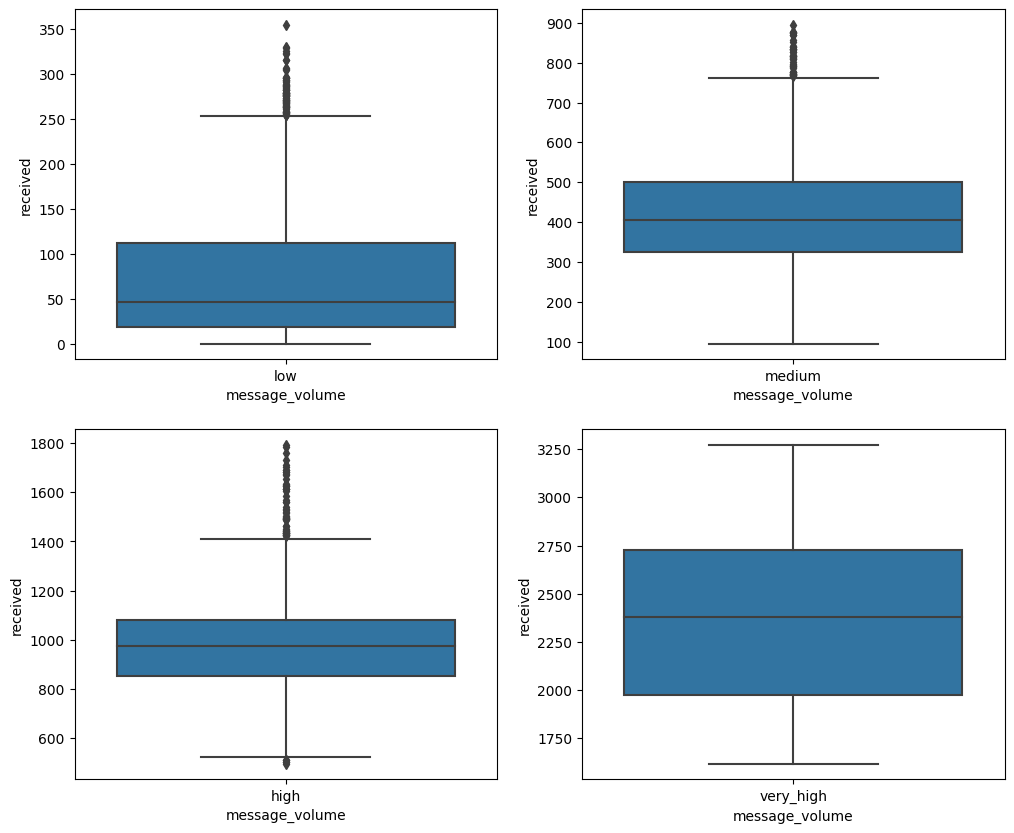

In [433]:
"""plot the distribution of received messages by volume label"""

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
low_volume_senders = message_volume[message_volume['message_volume'] == 'low']
sns.boxplot(data=low_volume_senders, y='received', x='message_volume', ax=ax[0, 0])
medium_volume_senders = message_volume[message_volume['message_volume'] == 'medium']
sns.boxplot(data=medium_volume_senders, y='received', x='message_volume', ax=ax[0, 1])
high_volume_senders = message_volume[message_volume['message_volume'] == 'high']
sns.boxplot(data=high_volume_senders, y='received', x='message_volume', ax=ax[1, 0])
very_high_volume_senders = message_volume[message_volume['message_volume'] == 'very_high']
sns.boxplot(data=very_high_volume_senders, y='received', x='message_volume', ax=ax[1, 1])

## Time Series Analysis

Prepare datasets for time series analysis.

In [434]:
"""group the friday, saturday, sunday and complete datasets by time and location"""

# prepare friday data
friday_messages_by_location = pd.DataFrame(friday.groupby(by=['Timestamp', 'location']).size(), columns=['y'])
friday_messages_by_location.reset_index(inplace=True)
friday_messages_by_location.rename(columns={'Timestamp': 'ds'}, inplace=True)
# prepare saturday data
saturday_messages_by_location = pd.DataFrame(saturday.groupby(by=['Timestamp', 'location']).size(), columns=['y'])
saturday_messages_by_location.reset_index(inplace=True)
saturday_messages_by_location.rename(columns={'Timestamp': 'ds'}, inplace=True)
# prepare sunday data
sunday_messages_by_location = pd.DataFrame(sunday.groupby(by=['Timestamp', 'location']).size(), columns=['y'])
sunday_messages_by_location.reset_index(inplace=True)
sunday_messages_by_location.rename(columns={'Timestamp': 'ds'}, inplace=True)
# prepare combined data
combined_messages_by_location = pd.DataFrame(combined.groupby(by=['Timestamp', 'location']).size(), columns=['y'])
combined_messages_by_location.reset_index(inplace=True)
combined_messages_by_location.rename(columns={'Timestamp': 'ds'}, inplace=True)

Plot message volume by location for the entire weekend.

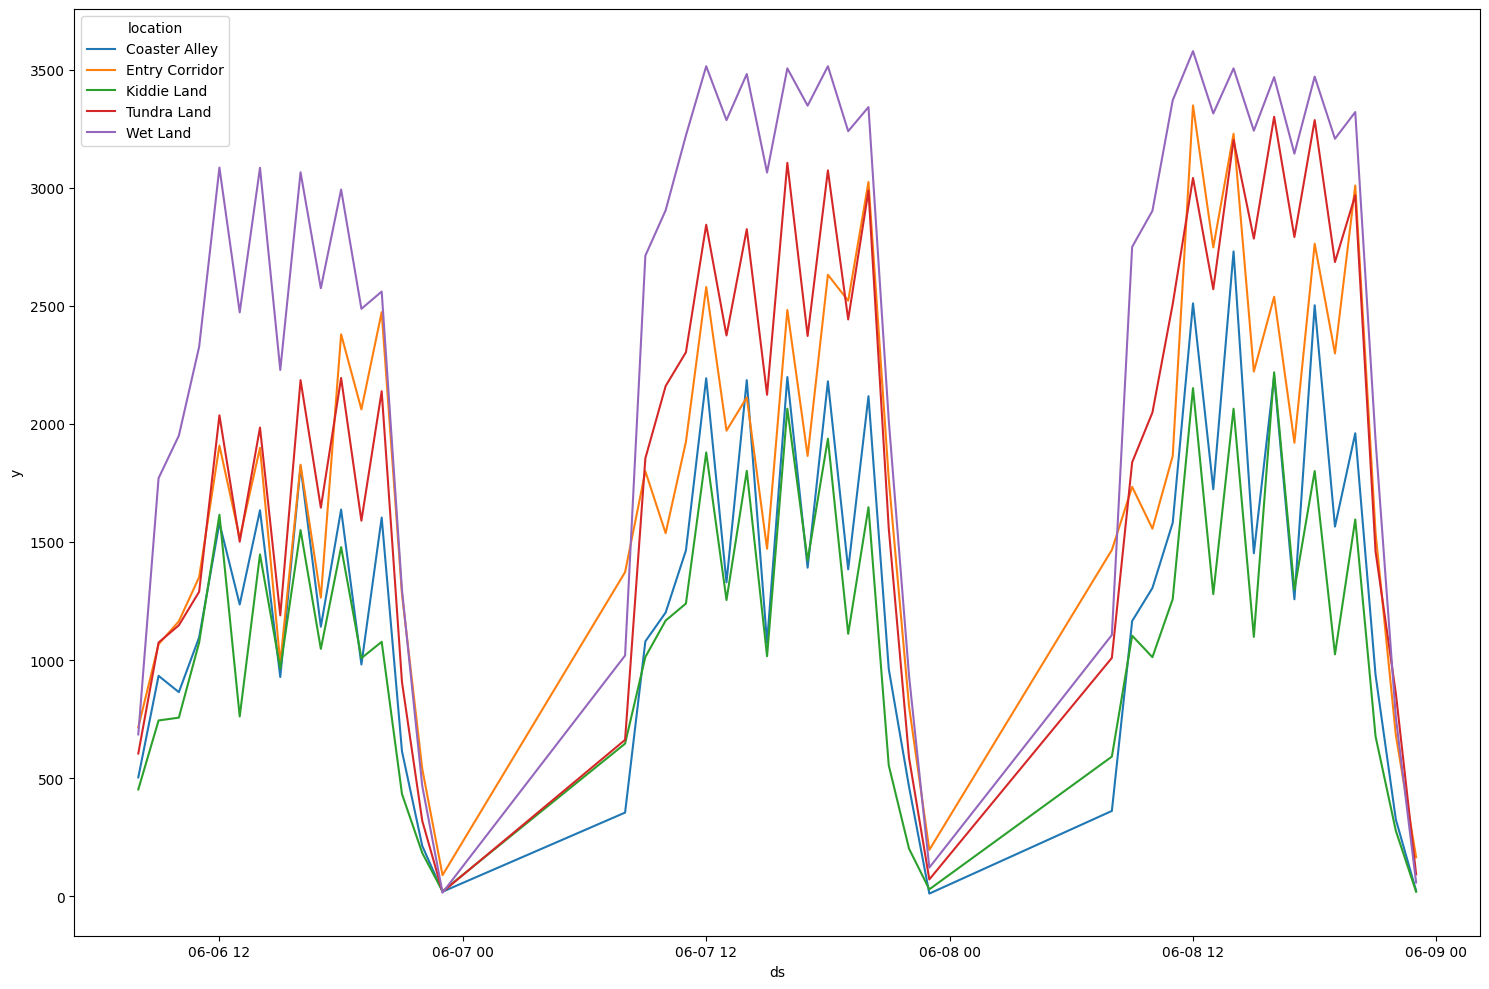

In [435]:
"""create combined subset"""

# prepare the data, group datetime values by hour
combined_messages_by_location_hourly  = pd.DataFrame(combined_messages_by_location.groupby([pd.Grouper(key='ds',axis=0, freq='H' ), 'location']).size(), columns=['y'])
combined_messages_by_location_hourly.reset_index(inplace=True)
# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=combined_messages_by_location_hourly, x='ds', y='y', hue='location')
plt.tight_layout()

Plot message volume by location for each day.

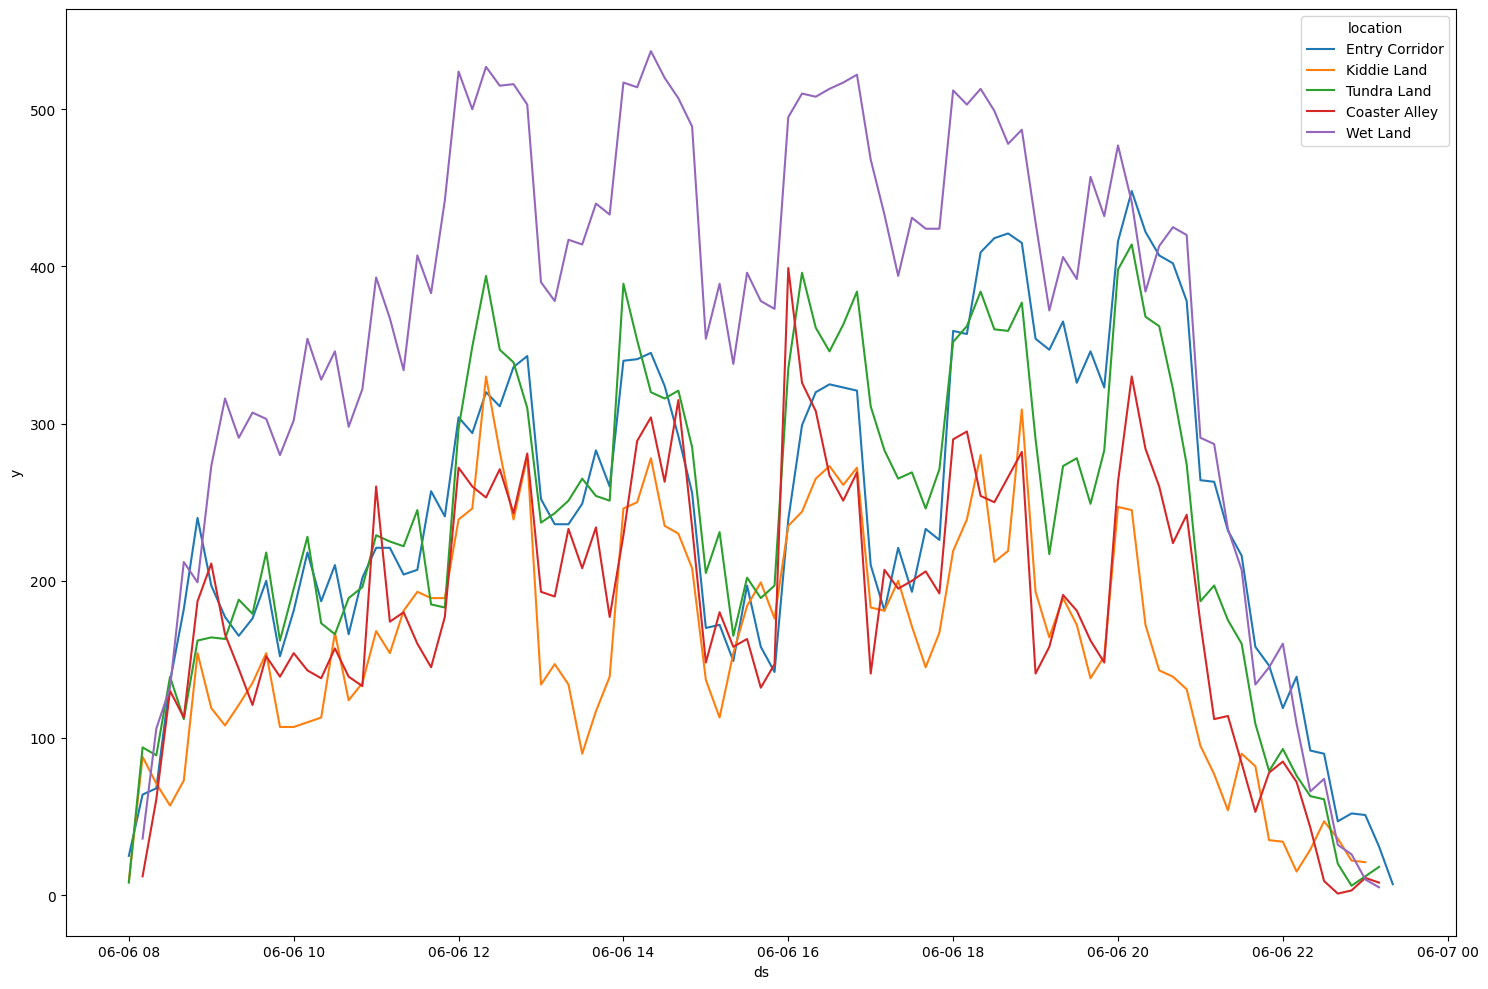

In [436]:
"""plot message volume by location for Friday"""

# prepare the data, group datetime values by hour
friday_messages_by_location_hourly  = pd.DataFrame(friday_messages_by_location.groupby([pd.Grouper(key='ds',axis=0, freq='10min' ), 'location']).size(), columns=['y'])
friday_messages_by_location_hourly.reset_index(inplace=True)
# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=friday_messages_by_location_hourly, x='ds', y='y', hue='location')
plt.tight_layout()

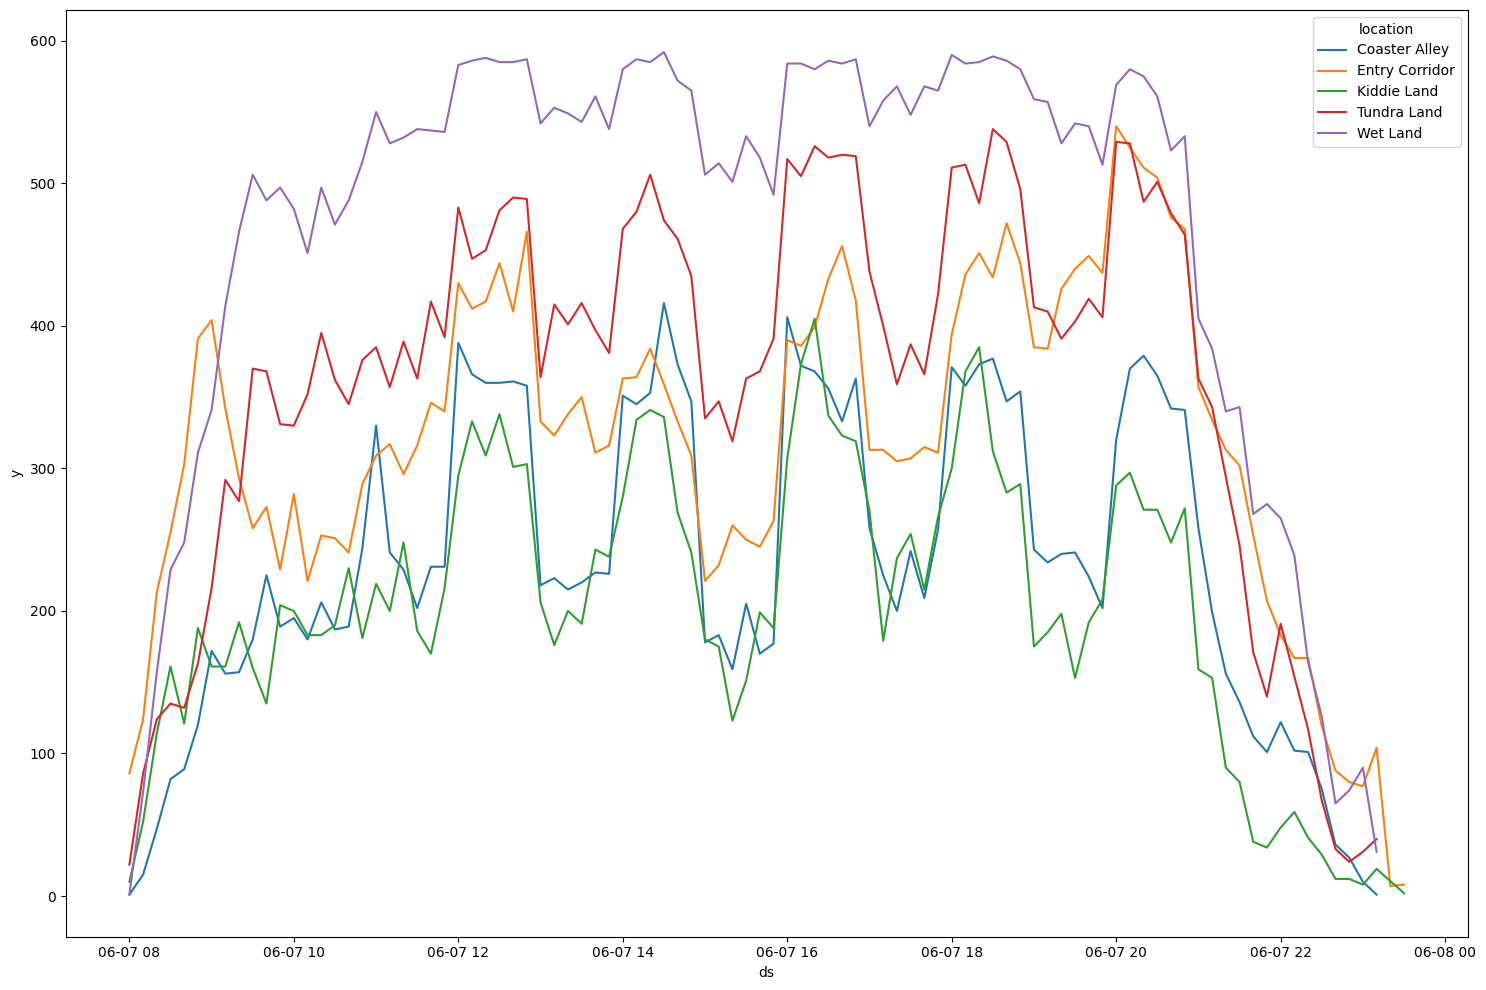

In [437]:
"""plot message volume by location for Saturday"""

# prepare the data, group datetime values by hour
saturday_messages_by_location_hourly  = pd.DataFrame(saturday_messages_by_location.groupby([pd.Grouper(key='ds',axis=0, freq='10min' ), 'location']).size(), columns=['y'])
saturday_messages_by_location_hourly.reset_index(inplace=True)
# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=saturday_messages_by_location_hourly, x='ds', y='y', hue='location')
plt.tight_layout()

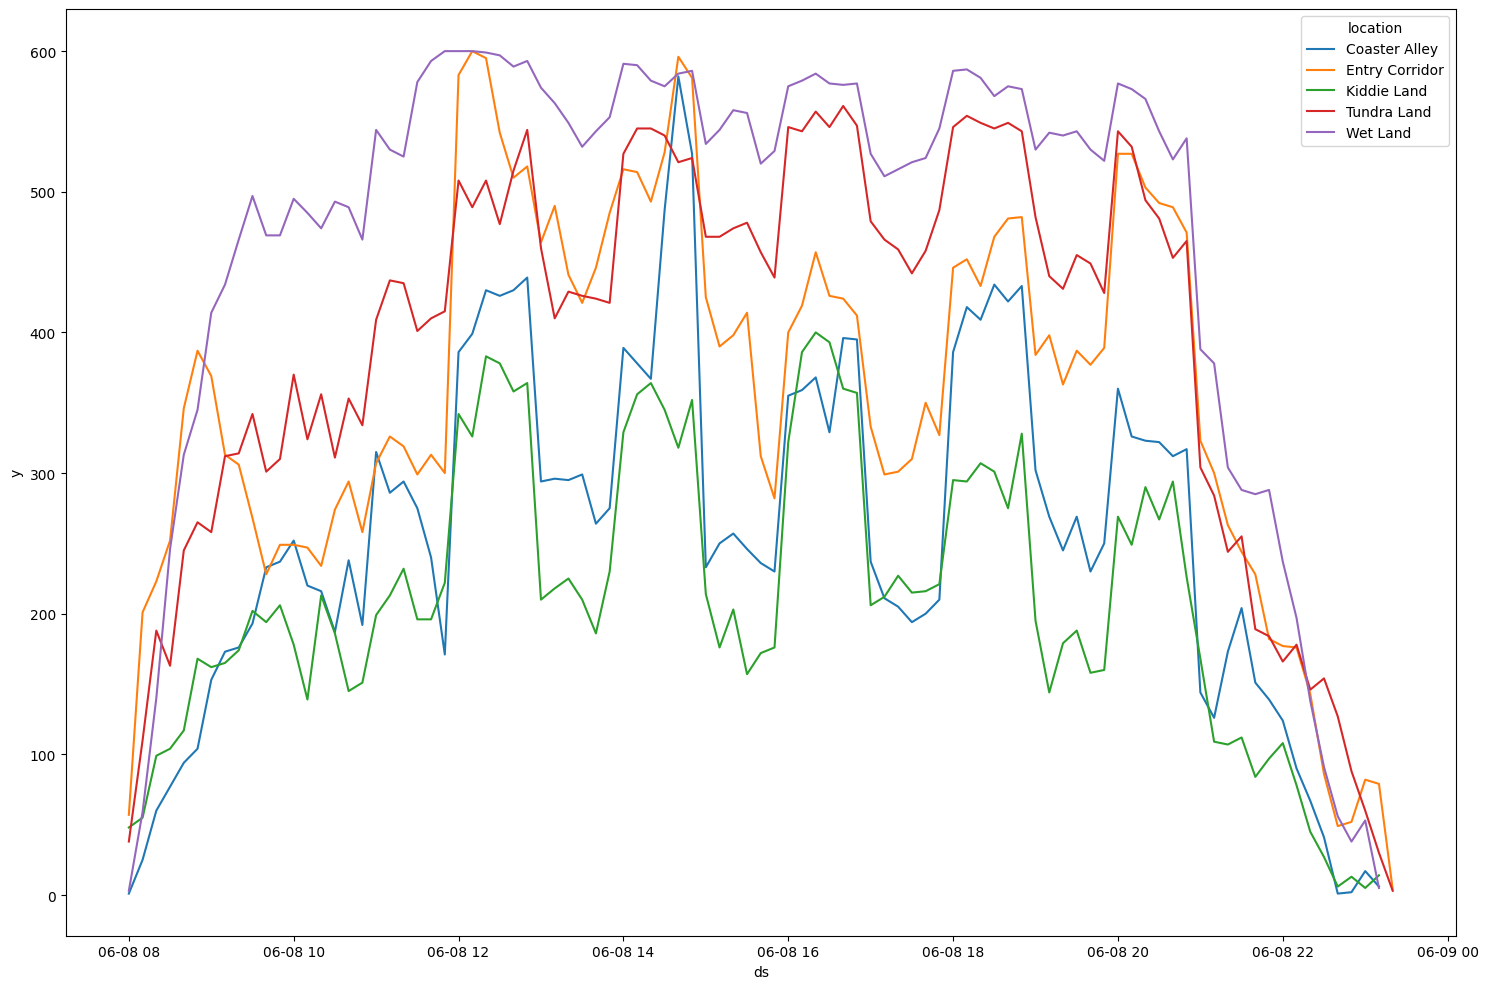

In [438]:
"""plot message volume by location for Sunday"""

# prepare the data, group datetime values by hour
sunday_messages_by_location_hourly  = pd.DataFrame(sunday_messages_by_location.groupby([pd.Grouper(key='ds',axis=0, freq='10min' ), 'location']).size(), columns=['y'])
sunday_messages_by_location_hourly.reset_index(inplace=True)
# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=sunday_messages_by_location_hourly, x='ds', y='y', hue='location')
plt.tight_layout()

Apply message volume labes to combined dataset for further analysis of groups.

In [439]:
"""apply volume labels to senders and receivers"""

# get the subeset of low volume senders
low_volume_senders = set(message_volume[message_volume['message_volume'] == 'low']['user_id'])
# get the subset of medium volume senders
med_volume_senders = set(message_volume[message_volume['message_volume'] == 'medium']['user_id'])
# get the subset of high volume senders
high_volume_senders = set(message_volume[message_volume['message_volume'] == 'high']['user_id'])
# get the subset of high volume senders
very_high_volume_senders = set(message_volume[message_volume['message_volume'] == 'very_high']['user_id'])
# get the subset of extreme outliers
extreme_outliers = set(message_volume[message_volume['message_volume'] == 'extreme']['user_id'])


# define a function to apply labels to combined dataframe

def apply_labels(value):

    if value == 'external':
        return 'external_receiver'
    if int(value) in low_volume_senders:
        return 'low'
    if int(value) in med_volume_senders:
        return 'medium'
    if int(value) in high_volume_senders:
        return 'high'
    if int(value) in very_high_volume_senders:
        return 'very_high'
    if int(value) in extreme_outliers:
        return 'extreme'
        
# apply transformations to the data
combined['sender_message_volume'] = combined['from'].apply(lambda x: apply_labels(x))
combined['receiver_message_volume'] = combined['to'].apply(lambda x: apply_labels(x))
# create message volume time series
senders_volume_series = pd.DataFrame(combined.groupby([pd.Grouper(key='Timestamp',axis=0, freq='10min' ),
                                          'location']).size(), columns=['message_count'])
senders_volume_series.reset_index(inplace=True)

Explore comunication patterns of high volume senders.

<AxesSubplot: xlabel='location', ylabel='count'>

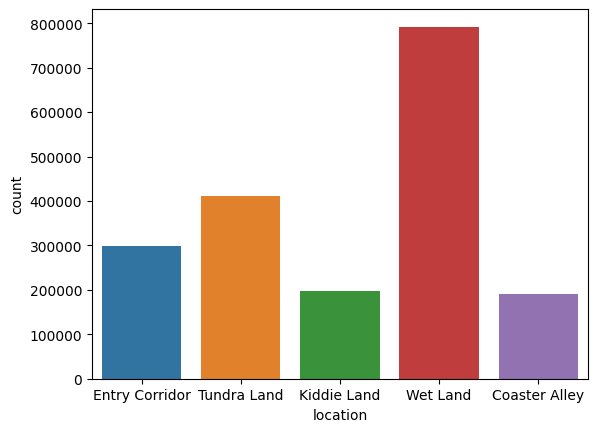

In [440]:
"""what locations do high volume senders frequent"""

sns.countplot(data=combined[combined['sender_message_volume'] == 'high'], x='location')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'very_high'),
  Text(1, 0, 'low'),
  Text(2, 0, 'high'),
  Text(3, 0, 'medium'),
  Text(4, 0, 'external_receiver'),
  Text(5, 0, 'extreme')])

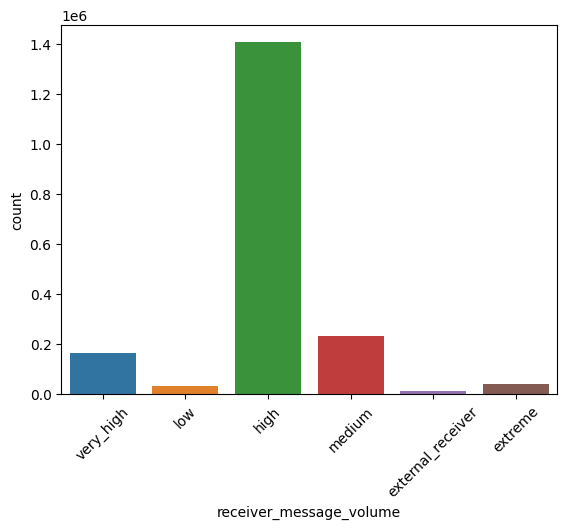

In [441]:
"""who do high volume senders communicate with"""

sns.countplot(data=combined[combined['sender_message_volume'] == 'high'], x='receiver_message_volume')
plt.xticks(rotation=45)

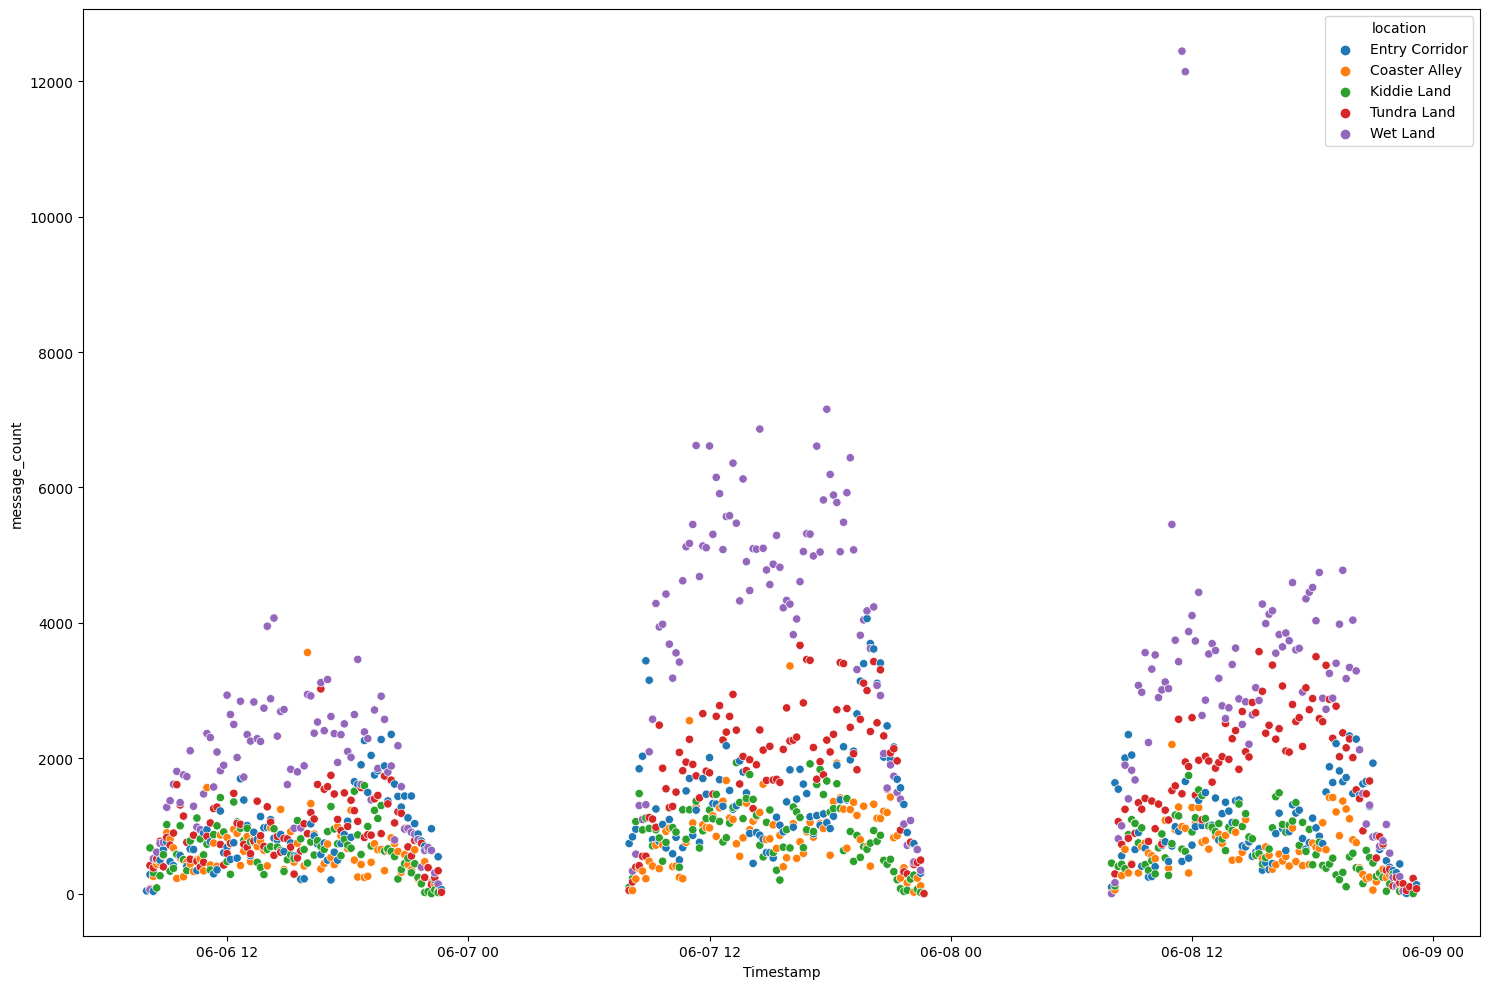

In [443]:
"""what does high volume sender communication look like over time"""

# create message volume time series
high_volume_senders_series = pd.DataFrame(combined[combined['sender_message_volume'] == 'high'].groupby([pd.Grouper(key='Timestamp',axis=0, freq='10min' ),
                                          'location']).size(), columns=['message_count'])
high_volume_senders_series.reset_index(inplace=True)

# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=high_volume_senders_series, x='Timestamp', y='message_count', hue='location')
plt.tight_layout()

Explore a comunication patterns of very high volume senders.

<AxesSubplot: xlabel='location', ylabel='count'>

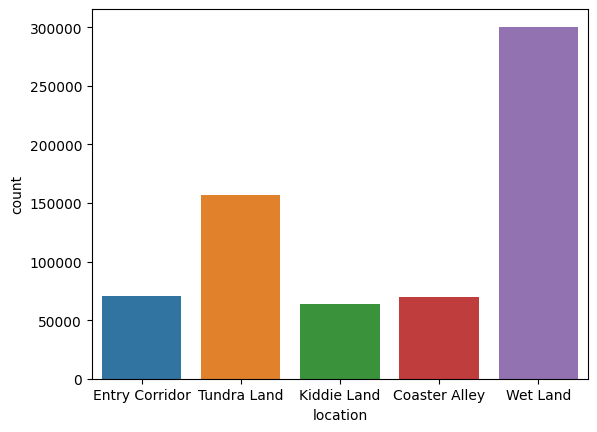

In [255]:
"""what locations do very high volume senders frequent"""

sns.countplot(data=combined[combined['sent_message_volume'] == 'very_high'], x='location')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'low'),
  Text(1, 0, 'high'),
  Text(2, 0, 'very_high'),
  Text(3, 0, 'medium'),
  Text(4, 0, 'external_receiver'),
  Text(5, 0, 'extreme')])

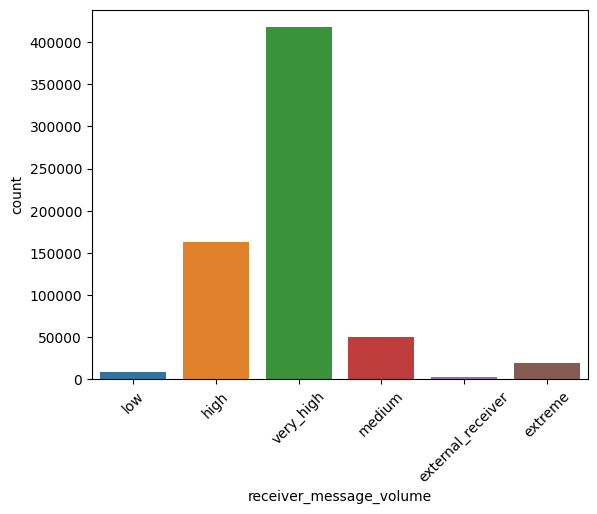

In [256]:
"""who do very high volume senders communicate with"""

sns.countplot(data=combined[combined['sent_message_volume'] == 'very_high'], x='receiver_message_volume')
plt.xticks(rotation=45)

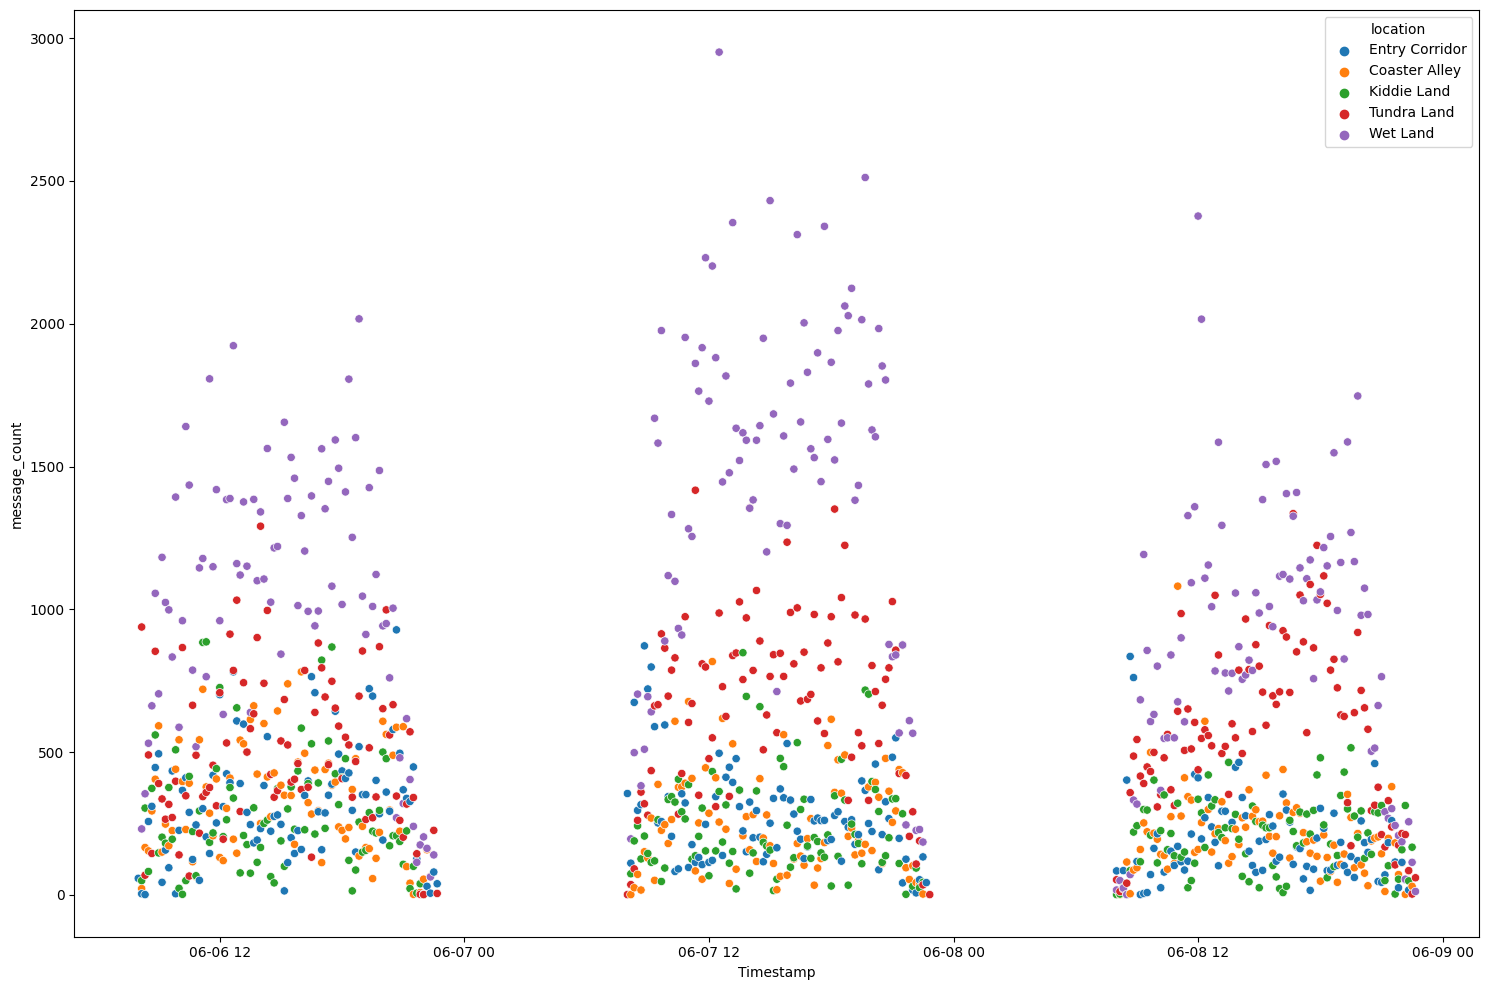

In [445]:
"""what does high volume sender communication look like over time"""

# create message volume time series
very_high_volume_senders_series = pd.DataFrame(combined[combined['sender_message_volume'] == 'very_high'].groupby([pd.Grouper(key='Timestamp',axis=0, freq='10min' ),
                                          'location']).size(), columns=['message_count'])
very_high_volume_senders_series.reset_index(inplace=True)

# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=very_high_volume_senders_series, x='Timestamp', y='message_count', hue='location')
plt.tight_layout()

Explore comunication patterns of extreme outliers.

<AxesSubplot: xlabel='location', ylabel='count'>

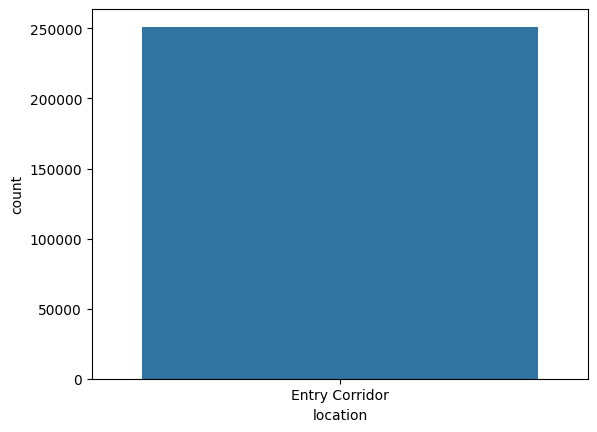

In [447]:
"""what locations do extreme outliers frequent"""

sns.countplot(data=combined[combined['sender_message_volume'] == 'extreme'], x='location')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'low'),
  Text(1, 0, 'medium'),
  Text(2, 0, 'high'),
  Text(3, 0, 'very_high')])

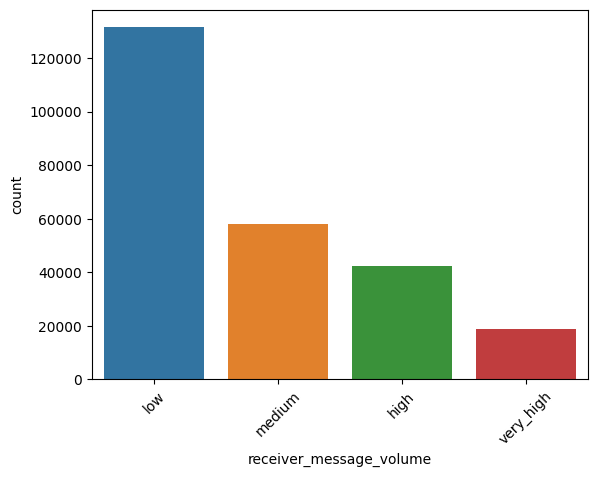

In [449]:
"""who do extreme outliers communicate with"""

sns.countplot(data=combined[combined['sender_message_volume'] == 'extreme'], x='receiver_message_volume')
plt.xticks(rotation=45)

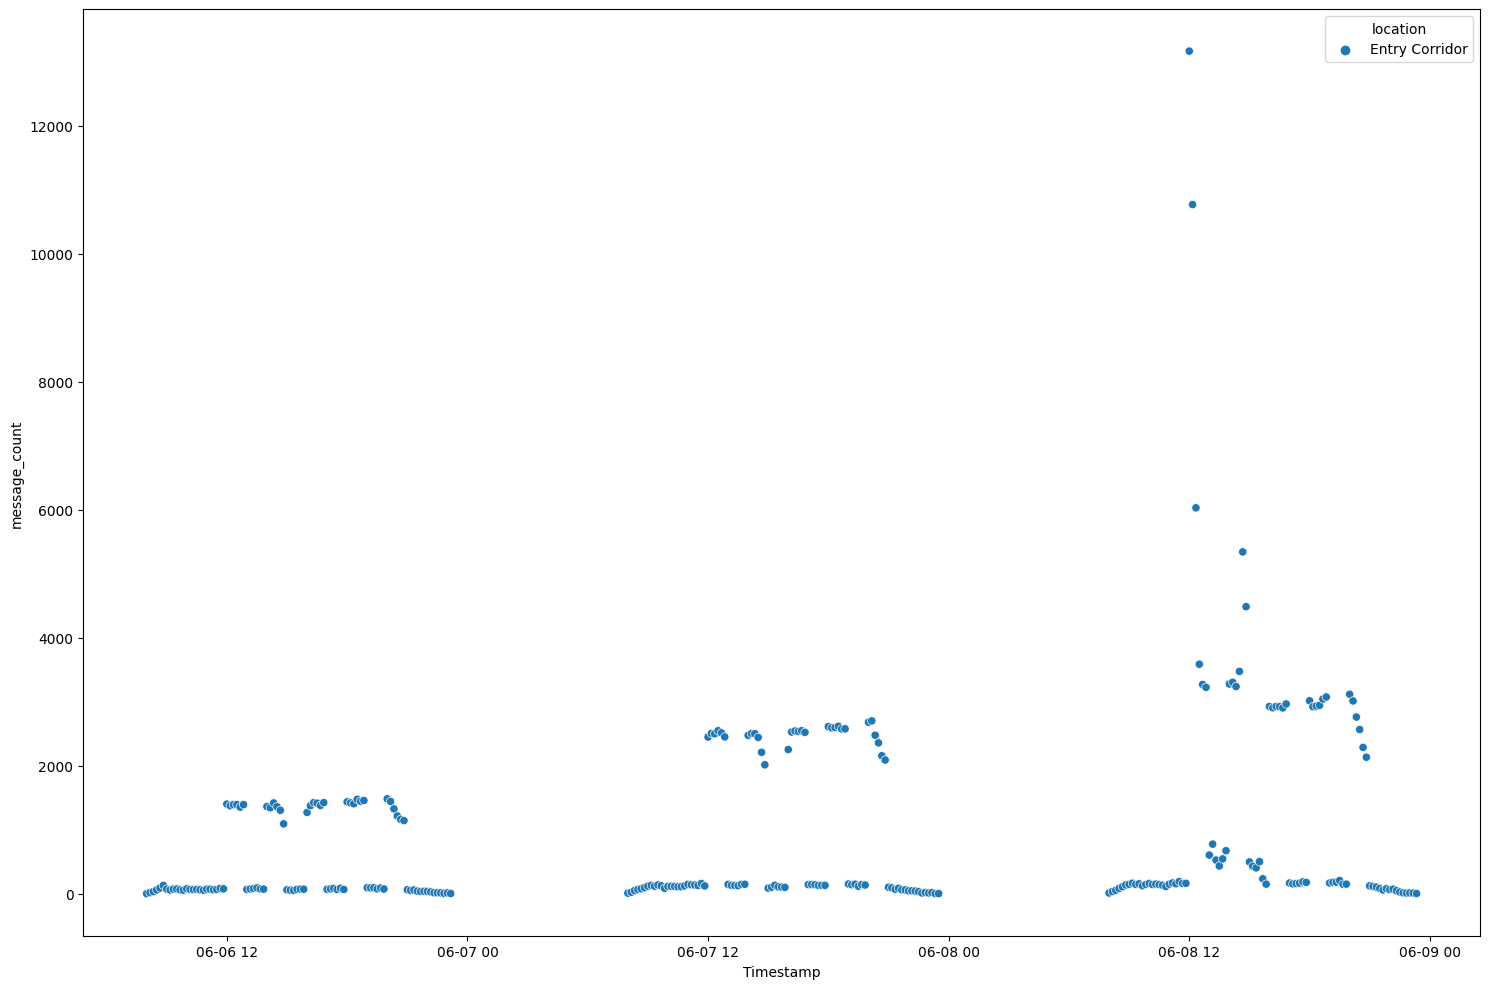

In [450]:
"""what extreme outlier sender communication look like over time"""

# create message volume time series
very_high_volume_senders_series = pd.DataFrame(combined[combined['sender_message_volume'] == 'extreme'].groupby([pd.Grouper(key='Timestamp',axis=0, freq='10min' ),
                                          'location']).size(), columns=['message_count'])
very_high_volume_senders_series.reset_index(inplace=True)

# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=very_high_volume_senders_series, x='Timestamp', y='message_count', hue='location')
plt.tight_layout()

Explore comunication patterns of high volume receivers.

<AxesSubplot: xlabel='location', ylabel='count'>

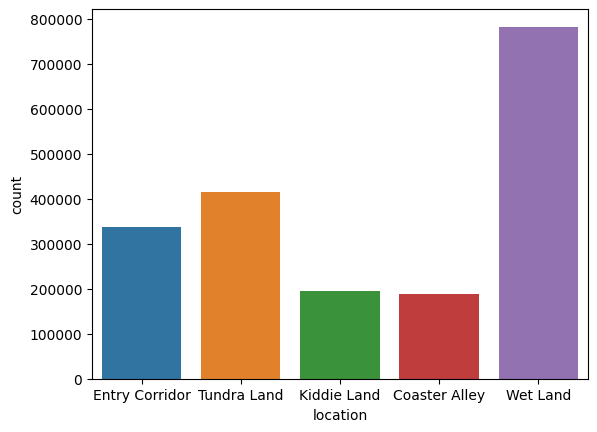

In [457]:
"""what locations do very high volume receivers frequent"""

sns.countplot(data=combined[combined['receiver_message_volume'] == 'high'], x='location')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'low'),
  Text(1, 0, 'very_high'),
  Text(2, 0, 'high'),
  Text(3, 0, 'medium'),
  Text(4, 0, 'extreme')])

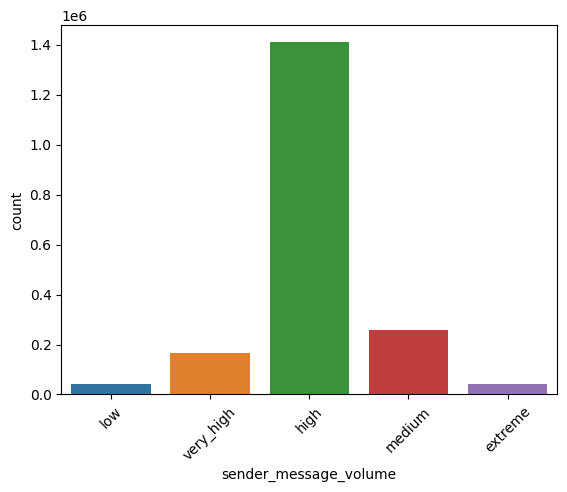

In [455]:
"""who do high volume receivers communicate with communicate with"""

sns.countplot(data=combined[combined['receiver_message_volume'] == 'high'], x='sender_message_volume')
plt.xticks(rotation=45)

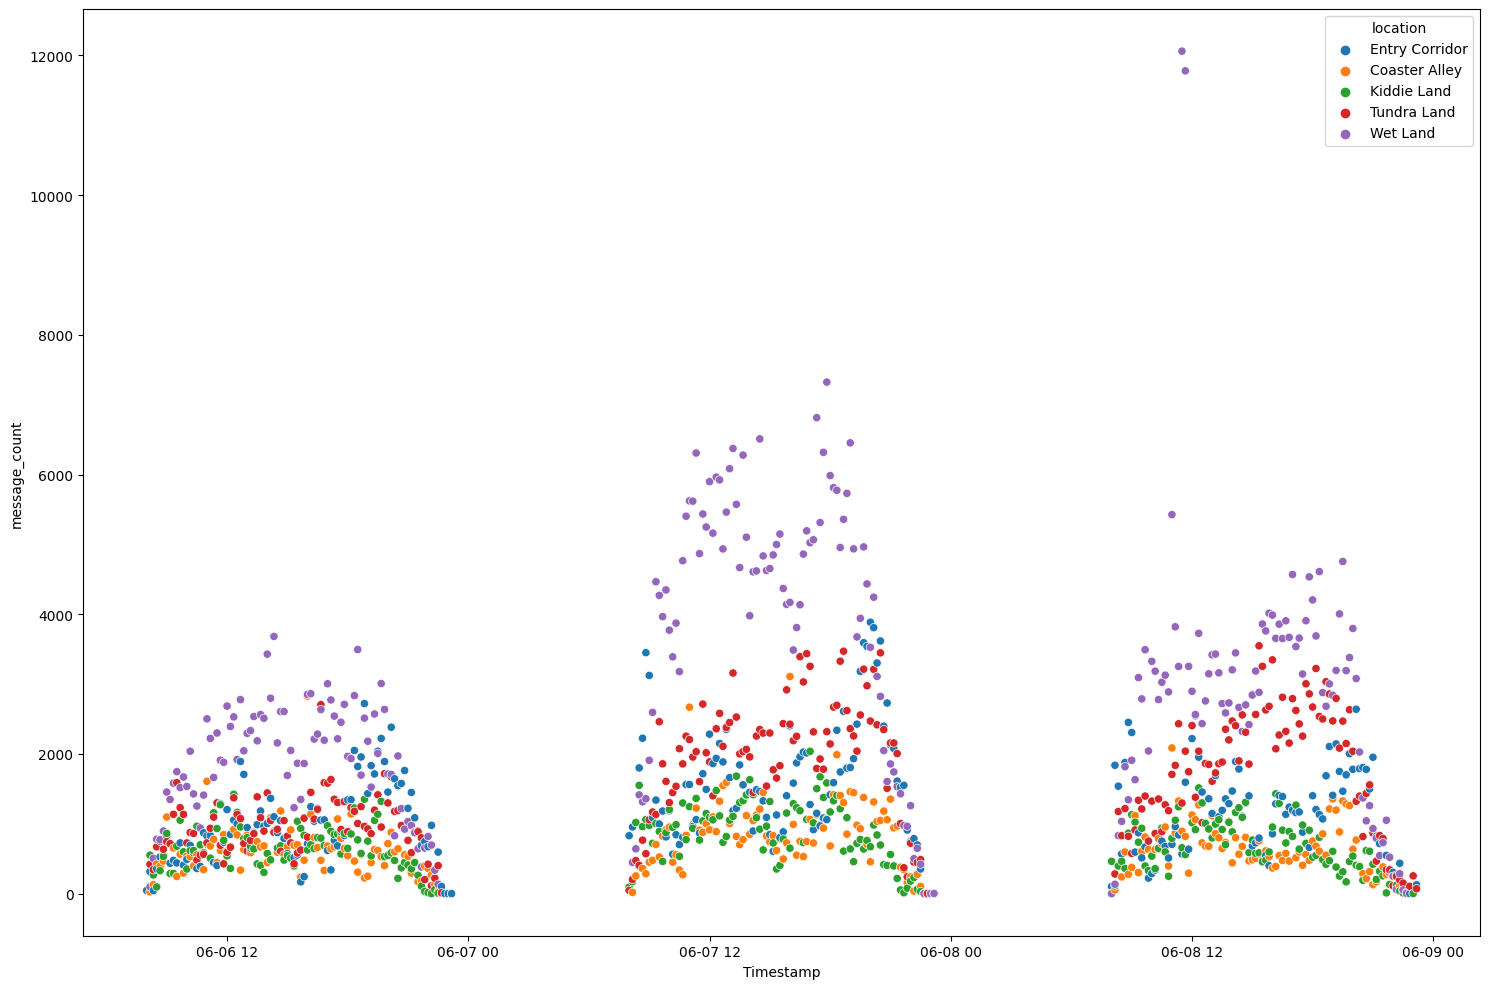

In [456]:
"""what does high volume receiver communication look like over time"""

# create message volume time series
high_volume_receivers_series = pd.DataFrame(combined[combined['receiver_message_volume'] == 'high'].groupby([pd.Grouper(key='Timestamp',axis=0, freq='10min' ),
                                          'location']).size(), columns=['message_count'])
high_volume_receivers_series.reset_index(inplace=True)

# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=high_volume_receivers_series, x='Timestamp', y='message_count', hue='location')
plt.tight_layout()

Explore communication patterns of very high volume receivers.

<AxesSubplot: xlabel='location', ylabel='count'>

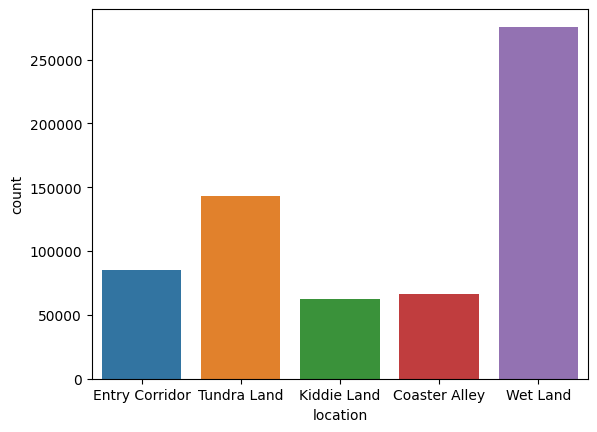

In [458]:
"""what locations do very high volume receivers frequent"""

sns.countplot(data=combined[combined['receiver_message_volume'] == 'very_high'], x='location')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'low'),
  Text(1, 0, 'very_high'),
  Text(2, 0, 'medium'),
  Text(3, 0, 'high'),
  Text(4, 0, 'extreme')])

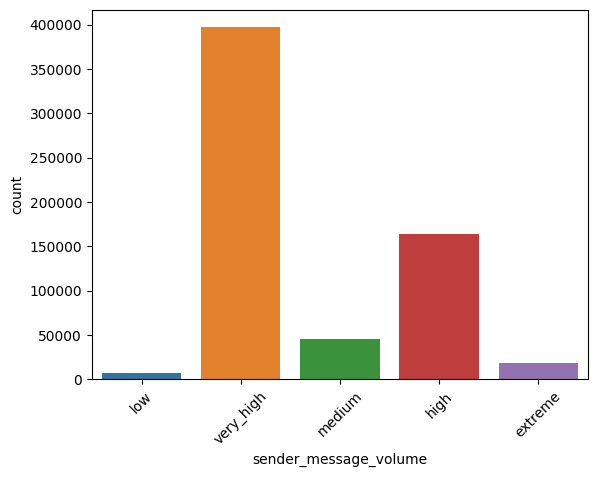

In [459]:
"""who do very high volume receivers communicate with communicate with"""

sns.countplot(data=combined[combined['receiver_message_volume'] == 'very_high'], x='sender_message_volume')
plt.xticks(rotation=45)

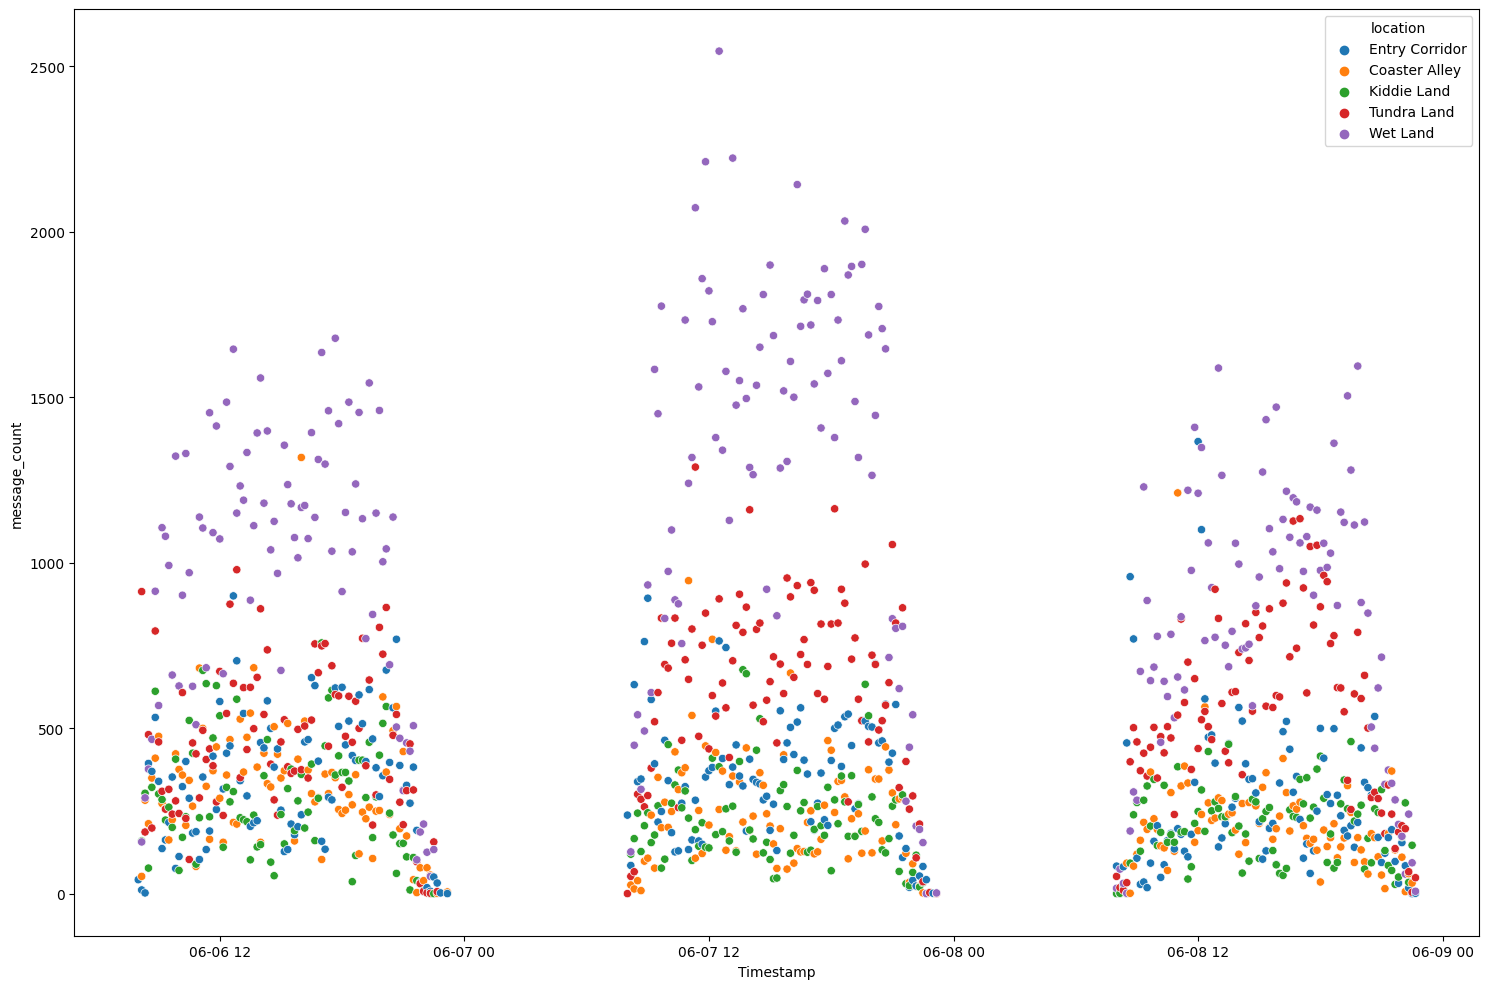

In [461]:
"""what does very high volume receiver communication look like over time"""

# create message volume time series
very_high_volume_receivers_series = pd.DataFrame(combined[combined['receiver_message_volume'] == 'very_high'].groupby([pd.Grouper(key='Timestamp',axis=0, freq='10min' ),
                                          'location']).size(), columns=['message_count'])
very_high_volume_receivers_series.reset_index(inplace=True)

# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=very_high_volume_receivers_series, x='Timestamp', y='message_count', hue='location')
plt.tight_layout()

Explore communication patterns of extreme outlier receivers.

<AxesSubplot: xlabel='location', ylabel='count'>

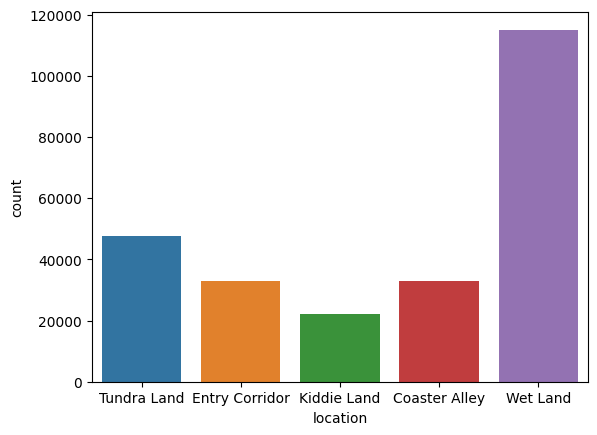

In [462]:
"""what locations do extreme outlier receivers frequent"""

sns.countplot(data=combined[combined['receiver_message_volume'] == 'extreme'], x='location')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'low'),
  Text(1, 0, 'medium'),
  Text(2, 0, 'high'),
  Text(3, 0, 'very_high')])

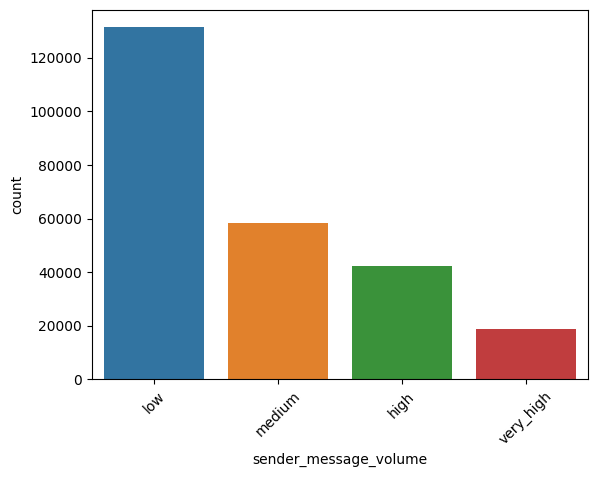

In [463]:
"""who do extreme outlier receivers communicate with"""

sns.countplot(data=combined[combined['receiver_message_volume'] == 'extreme'], x='sender_message_volume')
plt.xticks(rotation=45)

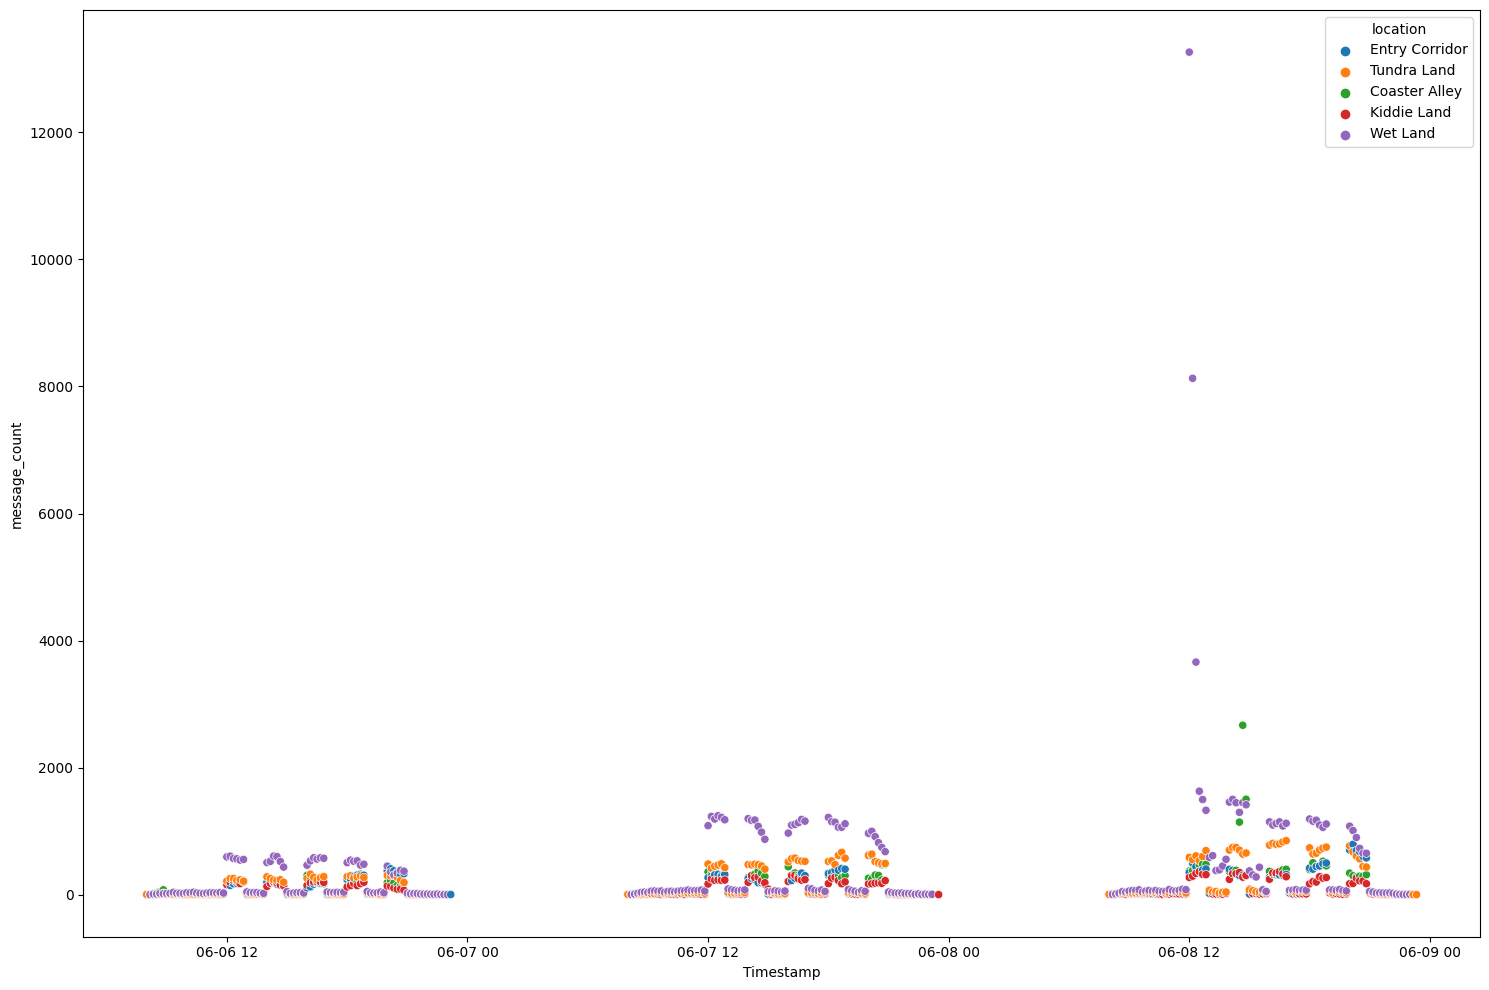

In [465]:
"""what does extreme outlier receiver communication look like over time"""

# create message volume time series
extreme_receivers_series = pd.DataFrame(combined[combined['receiver_message_volume'] == 'extreme'].groupby([pd.Grouper(key='Timestamp',axis=0, freq='10min' ),
                                          'location']).size(), columns=['message_count'])
extreme_receivers_series.reset_index(inplace=True)

# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=extreme_receivers_series, x='Timestamp', y='message_count', hue='location')
plt.tight_layout()

07:11:15 - cmdstanpy - INFO - Chain [1] start processing
07:11:35 - cmdstanpy - INFO - Chain [1] done processing


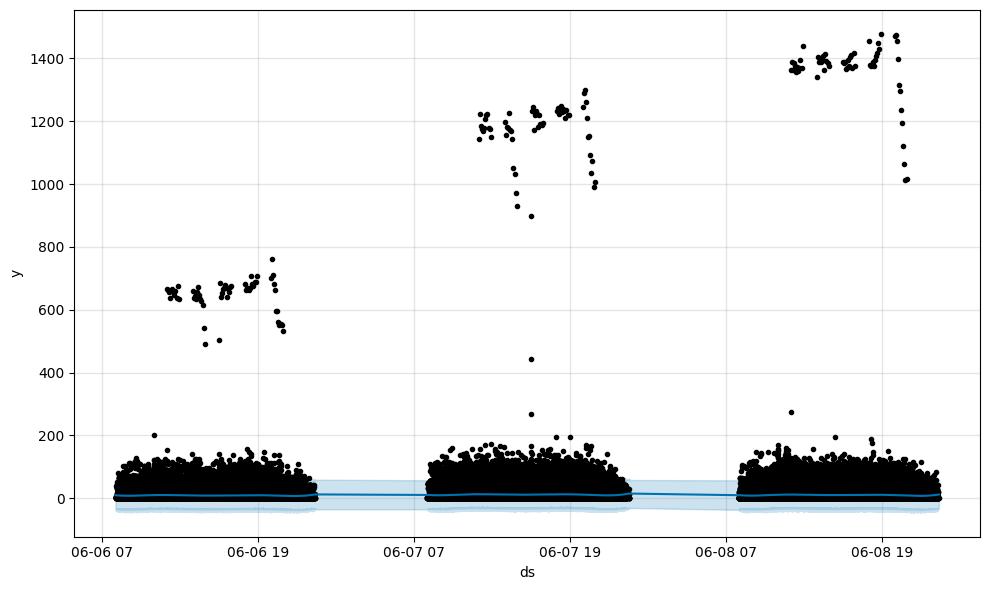

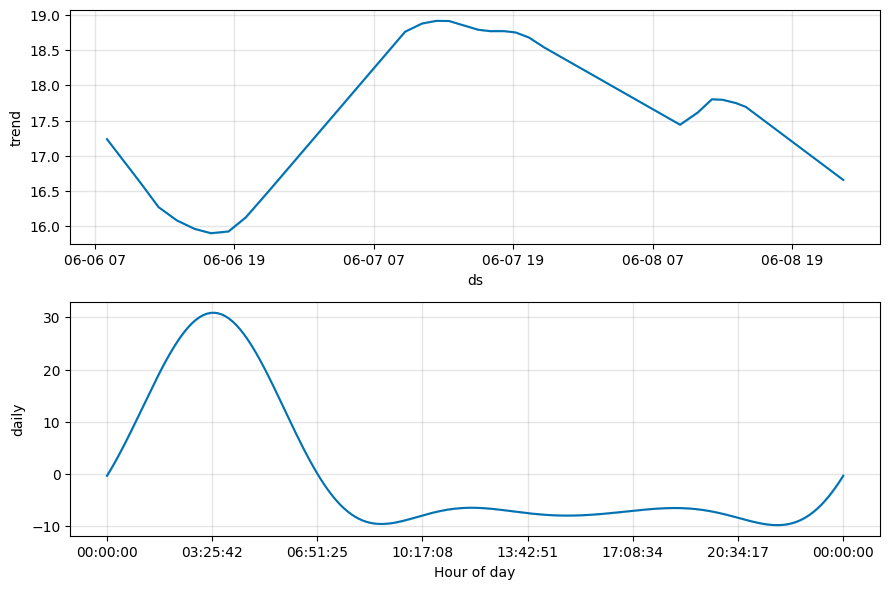

In [65]:
"""create time series model for combined dataset"""

combined_model = Prophet(interval_width=0.90)
combined_model.fit(combined_messages_by_location)
# create the forecast for combined data
combined_forecast = combined_model.predict(combined_messages_by_location)
# visualize the forecast,add semicolon to avoid duplicate charts
combined_model.plot(combined_forecast)
combined_model.plot_components(combined_forecast);

In [70]:
"""merge the forecasted data and actual data for combined dataset"""

combined_messages_by_location = pd.merge(combined_messages_by_location, combined_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

07:15:42 - cmdstanpy - INFO - Chain [1] start processing
07:15:49 - cmdstanpy - INFO - Chain [1] done processing


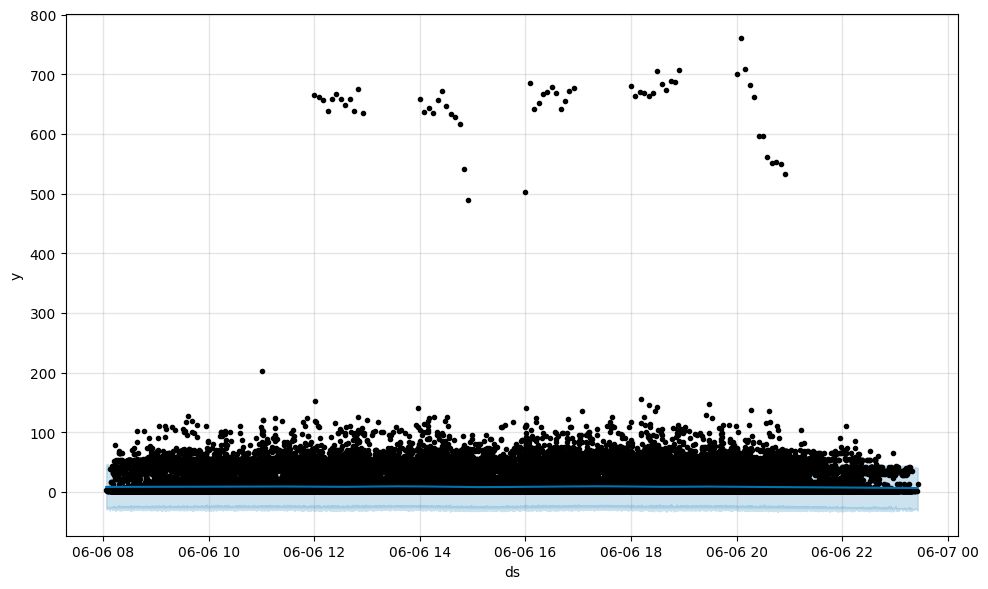

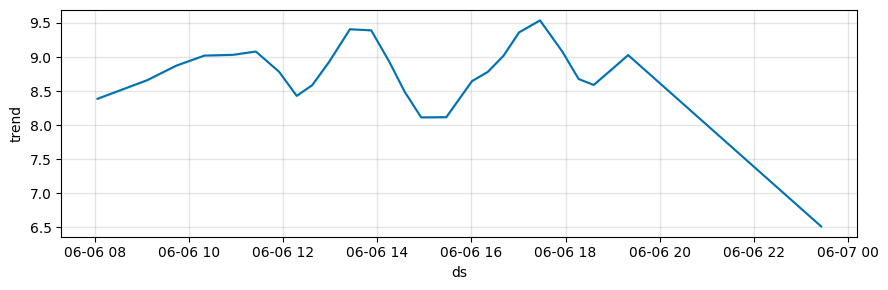

In [66]:
"""instantiate the initial prophet model for friday"""

# create the friday model
friday_model = Prophet(interval_width=0.90)
friday_model.fit(friday_messages_by_location)
# create the forecast for friday
friday_forecast = friday_model.predict(friday_messages_by_location)
# visualize the forecast,add semicolon to avoid duplicate charts
friday_model.plot(friday_forecast);
# visualize the model components for friday
friday_model.plot_components(friday_forecast);

07:16:30 - cmdstanpy - INFO - Chain [1] start processing
07:16:41 - cmdstanpy - INFO - Chain [1] done processing


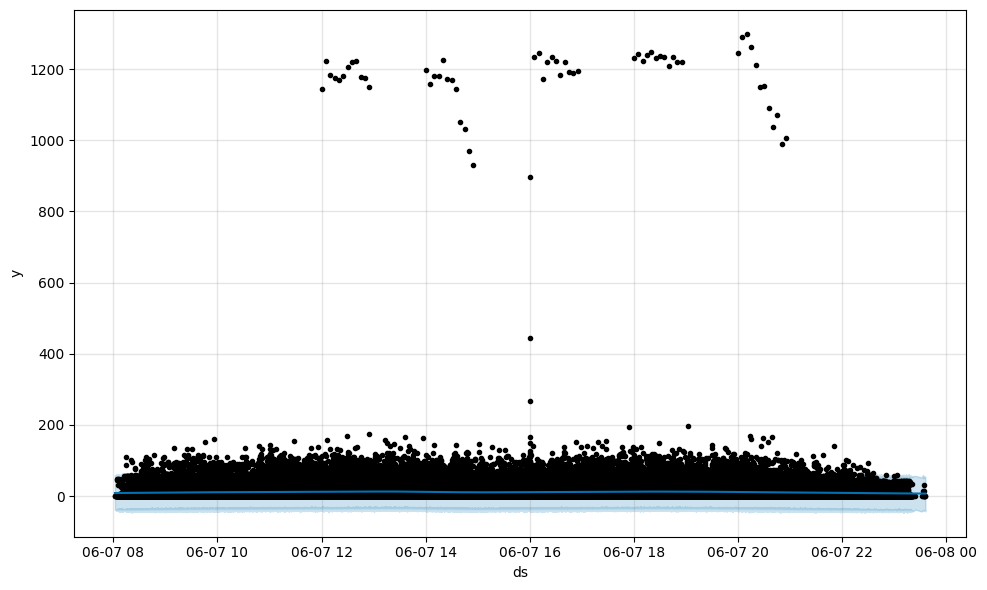

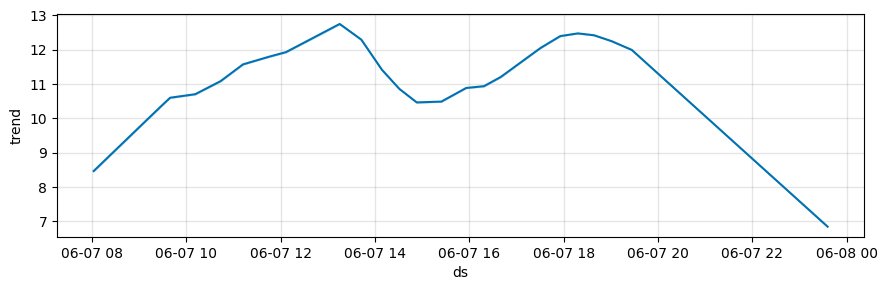

In [67]:
"""instantiate the initial prophet model for saturday"""

# create the saturday model
saturday_model = Prophet(interval_width=0.90)
saturday_model.fit(saturday_messages_by_location)
# create the forecast for saturday
saturday_forecast = saturday_model.predict(saturday_messages_by_location)
# visualize the forecast,add semicolon to avoid duplicate charts
saturday_model.plot(saturday_forecast);
# visualize the model components for saturday
saturday_model.plot_components(saturday_forecast);

07:21:16 - cmdstanpy - INFO - Chain [1] start processing
07:21:31 - cmdstanpy - INFO - Chain [1] done processing


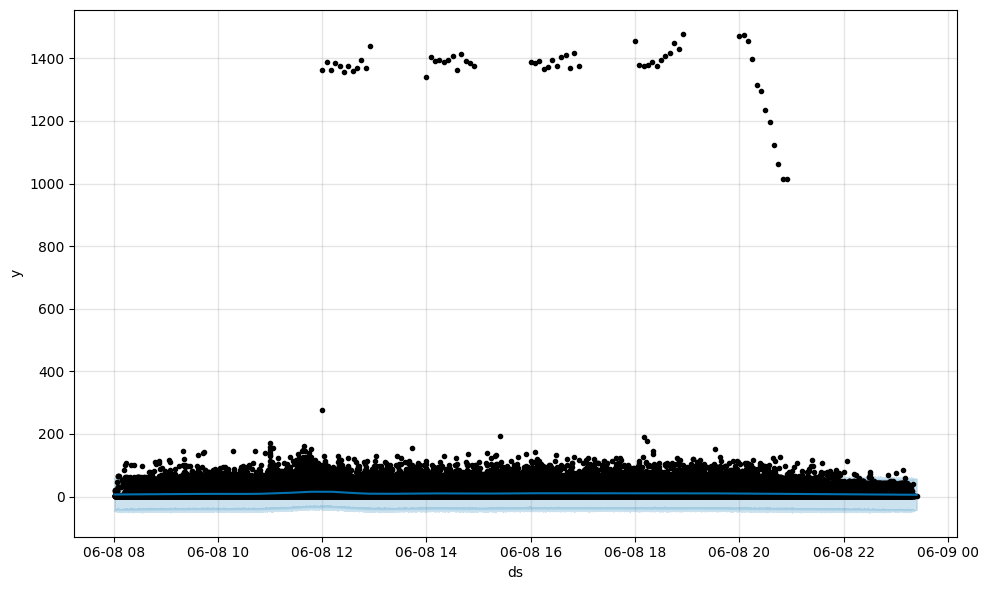

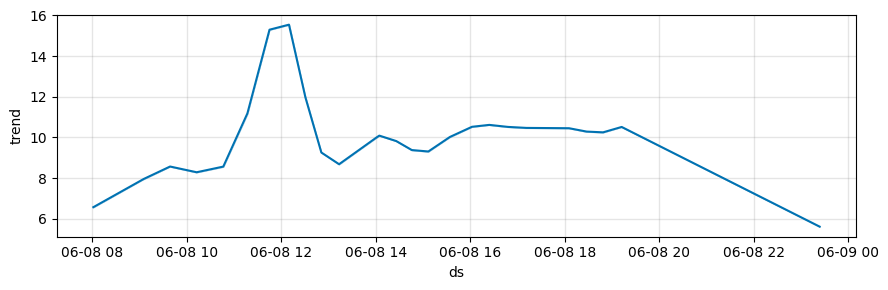

In [69]:
"""instantiate the initial prophet model for sunday"""

# create the sunday model
sunday_model = Prophet(interval_width=0.90)
sunday_model.fit(sunday_messages_by_location)
# create the forecast for sunday
sunday_forecast = sunday_model.predict(sunday_messages_by_location)
# visualize the forecast,add semicolon to avoid duplicate charts
sunday_model.plot(sunday_forecast);
# visualize the model components for sunday
sunday_model.plot_components(sunday_forecast);